### Mercedes Benz Greener Manufacturing 

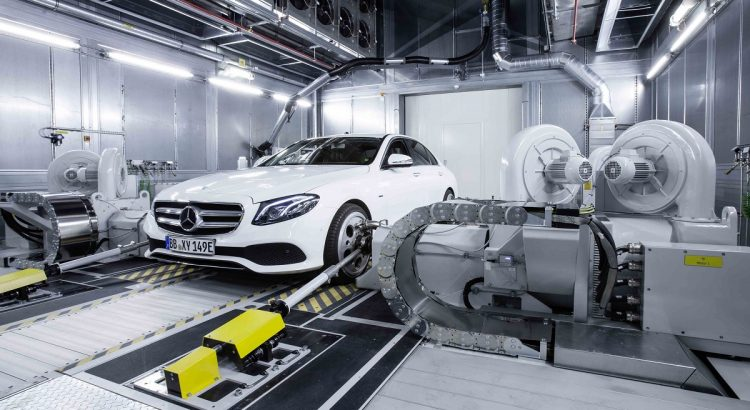

image source : https://www.rad-ab.com/2016/12/23/mercedes-benz-auf-dem-pruefstand/ (glimpse of Benz testing rooms)

<u><b>Abstract</b></u>

Mercedes Benz is Manufacturer of premium cars. Daimler’s Mercedes-Benz is the
European leader among the premium car makers. This has been possible with quality
Research, Engineering , Manufacturing and Testing. They also provide a variety of
features for customers to customize their Mercedes-Benz. Now all these cars have to
be tested for functionality of equipment within the car. They also have to meet quality
standards and safety to achieve best performance when they hit the road. This requires
the testing line within the factory to be versatile to handle every unique car. To tackle
testing of a variety of cars, Company Engineers have built a robust testing system which
can handle every unique configuration of the car. Testing line has to function efficiently
as more the time the car spends on the testing, the more it contributes towards carbon
emissions. Optimizing speed of testing keeps the production line eco-friendly. It is quite
a challenge for company to optimize the speed of its testing system for so many
possible feature combinations. It is complex and time-consuming without a smart
numerical method. Being world’s biggest manufacturers of cars, it is crucial to have a
production line which is efficient and has control over their greenhouse gas emissions.

<u><b>Business problem</b></u>

Company need to keep their production time in check as it reduces their carbon
emissions. Car testing time is of prime interest as it has an impact on company's carbon
footprint. Thus controlling it makes way for greener manufacturing. To help improve the
testing system speed, it is important to understand how the car configuration affects the
process time and to what extent.

Here we need to understand there are a lot of car configurations possible and they might be unique depending on customer choices. It is not economical to have testing system for every possible configurations. So there has to be fewer or if possible one testing system capable to handle testing of all the car configurations.  

As per market demands factories produce cars which go through the assembly line in a queue. After assembly ends, cars enter the test bench. But the car has to wait for the testing system to be setup for its configuration if the previous car was of different configuration.

Thus we can see that Test bench has to go through cycle :

Setup test bench for unique car >> Test the car >> Setup >> Test >> Setup >> Test >> Setup >> Test >>.....

Time is spent to setup the test bench to handle the particular unique car coming for testing. Then the car spends a certain time on the test bench which will be unique to its configuration. Thus total time for testing = setup time + actual car testing time.

To optimize total testing time, we need to look into two aspects:

Setup - This will depend on selecting and organizing the tools required for testing unique car configuration.

Actual testing - This will depend on how quickly tools get the results of specific testing of the car on the test bench. 

(Note: Level of automation in testing is not known for current problem)

The above two aspects can be modified to optimize testing time, if we know how configuration affects the testing time.
It will help the testing team to plan and reorganize the test bench accordingly.

Thus we have the requirement to evaluate/predict testing time based on car configuration. Measured testing time can be compared with predicted one to see if there is delay. This keeps watch on Test Bench performance. 

Now there are hundreds of configurations the company offers to their customers. Predicting the testing time based on so many configurations is not a easy task. We need a systematic approach. Machine Learning is a state of the art technique which can provide insight into the impact of car configuration on testing time. ML model has to be trained on measured test time of particular car configuration. One with the best metric score will help predict testing time and help optimize speed of testing of cars while not affecting the company standards.

Thus the Business problem we have at hand is to predict the time
a car takes to pass testing for a given configuration. Hence there has been a kaggle
competition hosted by the company to tackle the problem, which can be found in the link
- https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview.

Note on competition leaderboard:

Public leaderboard is calculated with approximately 19% of the test data.
Private leaderboard is calculated with remaining 81% of the test data.

<u><b>Machine Learning formulation of the business problem</b></u>

Company provides information of testing time of multiple cars with their particular configuration. With this data, we have to train a Machine Learning model which has to predict the Real valued output of car testing time for given labelled features which represents a set of car configurations. Model’s performance has to be measured using coefficient of determination (R^2 value). Model should be interpretable, so that which feature impacts the testing time can be extracted.

Machine learning model should have high metric score for predicted testing time. When model performance increases, predicted time is more accurate which drives testing of cars to be more organized and the speed of testing is improved. Thus reducing the carbon emissions during testing of cars. 

<u><b>Business constraints</b></u>

- To predict testing time spent on a car with a high R^2 value.
- No strict latency constraints.

<u><b> Performance metric </b></u> 

Performance metric :
The metric considered to evaluate the models in the competition is R^2.

Other metrics which can be taken up are Mean Square Error/Mean Absolute
Error/Mean Absolute Percentage error.

<u><b>Data set column analysis</b></u>

Following files are provided for analysis
- train.csv
- test.csv
- sample_submission.csv

train.csv file consists of 4209 rows, 378 columns. Each row represents a car and
columns represent its configuration and time. Configurations are encoded as categories
under labels, where one feature has label ID and other features have ‘X’ followed by a
number as label. The ground truth is labeled ‘y’ and represents the time (in seconds)
that the car took to pass testing with specific features configuration.

test.csv consists of data of size (4209,377) having columns ID and Features X0 to
X385. The time is not provided in this file. Our trained model has to predict time for the
configuration in test.csv. This will be used to evaluate the model by the company to put
the best one in the leaderboard. This data cannot be used to improve our performance
as y data is not available for us.

sample_submission.csv captures the format in which the test data predictions to be
submitted for the competition.

Now we have to make use of 4209 rows alone(train.csv) to train and validate. The data
size we have is small. The best way we have to get good model performance is to do
k-fold cross validation.

### Module imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import category_encoders as ce
import random
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from itertools import combinations

In [3]:
import warnings
warnings.filterwarnings( "ignore")#, module = "matplotlib\*" )

### Loading Data from .csv file

data source : https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data

In [4]:
# loading train csv data to pandas data frame
car_data = pd.read_csv('train.csv')

In [5]:
car_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


##### The data captures the details of 4209 car configuration with 378 features where testing time is in column 'y'

#### Datatypes of the features

We will check the data types of the information available in the data given to us.

In [6]:
# datatypes count in given data
car_data.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

- There are 369 columns with datatype integers
- There are 8 columns which are of type objects
- one column is of type float

#### Features with type objects

In [7]:
car_data.dtypes[car_data.dtypes == 'object']

X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

#### Features with type float

In [8]:
car_data.dtypes[car_data.dtypes == 'float64']

y    float64
dtype: object

#### Features with type integers

In [9]:
car_data.dtypes[car_data.dtypes == 'int64']

ID      int64
X10     int64
X11     int64
X12     int64
X13     int64
        ...  
X380    int64
X382    int64
X383    int64
X384    int64
X385    int64
Length: 369, dtype: object

#### Let us check unique values counts of all features

In [10]:
# Defining dictionary to capture feature list and its size of unique values
feat_dict = {'features' : car_data.columns,
             'uniq_count' : []}

In [11]:
# getting unique value size for each feature
for feat in car_data.columns:
    feat_dict['uniq_count'].append(len(car_data[feat].unique()))

In [12]:
# creating a dataframe of above feature dictinary for studying data
feat_dict_df = pd.DataFrame(feat_dict)
feat_dict_df

,features,uniq_count
0,ID,4209
1,y,2545
2,X0,47
3,X1,27
4,X2,44
...,...,...
373,X380,2
374,X382,2
375,X383,2
376,X384,2


#### We will check how many features have same unique value counts (Ex. how many features have only 2 unique values)

In [13]:
feat_dict_df['uniq_count'].value_counts()

2       356
1        12
2545      1
4209      1
47        1
44        1
29        1
27        1
25        1
12        1
7         1
4         1
Name: uniq_count, dtype: int64

Here we observe that majority of features have value counts 2.
We will explore each feature in EDA section.

#### Features with only one value across all rows

In [14]:
feat_dict_df[feat_dict_df['uniq_count']==1]['features']

11      X11
91      X93
105    X107
227    X233
229    X235
262    X268
283    X289
284    X290
287    X293
291    X297
323    X330
340    X347
Name: features, dtype: object

The above 12 features can be ignored while building the model as they are constant.

#### Features with two unique values

In [15]:
# Listing out feature names with two unique value counts
feat_dict_df[feat_dict_df['uniq_count']==2]['features']

10      X10
12      X12
13      X13
14      X14
15      X15
       ... 
373    X380
374    X382
375    X383
376    X384
377    X385
Name: features, Length: 356, dtype: object

In [16]:
# Checking unique values of feature 'X10' which has only 2 unique values
car_data['X10'].unique()

array([0, 1], dtype=int64)

So we observe that one of feature with 2 unique values have 0 or 1 

we will check if all the features with 2 unique values are similar 

In [17]:
# Check whether all features with 2 unique values are binary or not

# Get feature names from feature dictionary
Two_val_feat = feat_dict_df[feat_dict_df['uniq_count']==2]['features']
Binary_count=0
nonBinary_count=0
# Get unique values of each feature (listed above) and check if it is one or zero
for feat in Two_val_feat:
    for i in car_data[feat].unique(): 
        if (i==0 or i ==1): #order of the unique value is not consistent across features 
            Binary_count+=1 #hence condition to check for both values
        else:
            nonBinary_count+=1
# Binary Counts are incremented twice on confirmation for same feature. 
# Hence we need to divide by 2 to get actual feature count
print('Binary_count:', Binary_count/2)
print('nonBinary_count:', nonBinary_count/2)

Binary_count: 356.0
nonBinary_count: 0.0


Thus we can confirm that all 356 features with 2 unique values have binary values 0 and 1

#### Observations :

Column description of given data -

ID - It is unique for each row - Type: integer

y - It captures the testing time - Type: float

X0,X1,X2,X3,X4,X5,X6 and X8 are of Type: object. These features are categorical.

X10 to X385 - 368 features are identified as type integers. But majority of these features have 0 or 1 as feature value.
So these features can be considered categorical. To differentiate these feature from features X0-X8, we will call them Binary Features.

12 out of 368 Features are of single value and are equal to zero. Identified features are
listed : X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347

Remaining 356 features are of binary which takes up value of 0 or 1


#### Check for duplicate rows

In [18]:
car_data[car_data.duplicated()]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


Data do not contain any duplicates rows. Thus we have unique rows in the data

### EDA

We have y as the dependent feature. We will study how y value depends on individual feature

#### Target variable - y 

We will start by looking into Target variable y alone which is a continuous value capturing time required for testing the car. 

Let us see distribution plot to understand what value the y takes up 

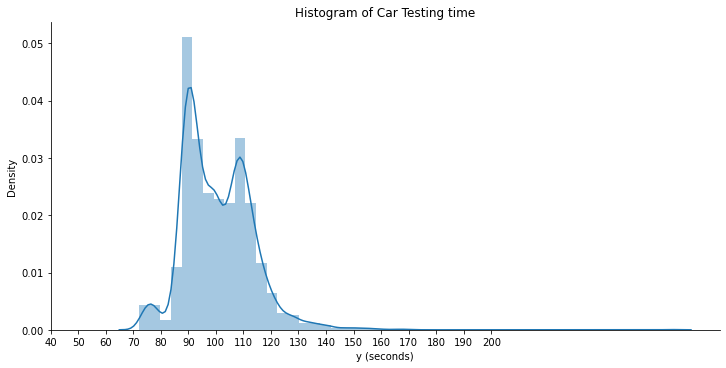

In [19]:
# Seaborn histogram plot
sb.FacetGrid(data=car_data, size=5, height = 3, aspect=2 )\
            .map(sb.distplot,"y")\
            .set(xticks=[40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])
plt.title('Histogram of Car Testing time')
plt.xlabel('y (seconds)')
plt.ylabel('Density')
plt.show()

In [20]:
car_data.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

#### Observations: 

- Distribution is not normal. 
- There are mulptiple peaks in density. 
- mean value distribution is around 100sec
- There are peaks around 75, 90 and 110sec
- Min value is 72 sec
- Max value is 265 sec
- 50% of the data are having testing time in range [90.82,109] seconds

#### Feature ID 

We know that ID feature is a collection of unique integers. So we will check scater plot of y vs ID

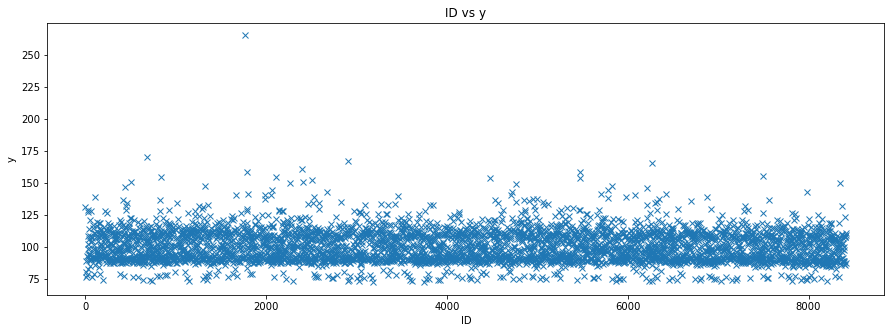

In [21]:
# Scatter plot of ID vs y (testing time in seconds)
plt.figure(figsize = (15,5))
plt.plot(car_data['ID'],car_data['y'],'x')
plt.title('ID vs y')
plt.xlabel('ID')
plt.ylabel('y')
plt.show()

We will have a look at correlation between ID and y

In [22]:
# correlation evaluation of columns ID and y
car_data[['ID','y']].corr('pearson')

,ID,y
ID,1.000000,-0.055108
y,-0.055108,1.000000


In [23]:
# Sequence of ID in train data
car_data.ID.head(10)

0     0
1     6
2     7
3     9
4    13
5    18
6    24
7    25
8    27
9    30
Name: ID, dtype: int64

In [24]:
# Sequence of ID in test data
car_data_test = pd.read_csv('test.csv')
car_data_test.ID.head(10)

0     1
1     2
2     3
3     4
4     5
5     8
6    10
7    11
8    12
9    14
Name: ID, dtype: int64

Comparing ID column in train and test data we observe that missing sequence values in train data are available in test data.
From this we can infer that ID is sequence of row numbers of observed data which is split randomly to train and test.

#### Observations:

- Here we observe that with increase in IDs value donot impact the value of y. 

- The correlation value is very low (close to zero). 

- ID column is collection of row numbers.

- Thus Feature ID will not be useful in predicting the value of y 

Note : From the above plot we can notice that there are outliers in the y distribution. We will look into outliers after EDA of features

#### Feature X0

Feautre X0 is categorical feature. categories are listed below

In [25]:
# unique values of feature X0 
car_data['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [26]:
# Number of unique values for feature X0
len(car_data['X0'].unique())

47

X0 has 47 unique categories. Categories are set of letters and letter combination

We will check how one category(say X0 = 'a') impacts value of y 

In [27]:
# Statistical Description of target variable for a given category under feature X0
car_data[car_data['X0']=='a']['y'].describe()

count     21.000000
mean     115.630952
std        7.924191
min      108.410000
25%      110.100000
50%      113.800000
75%      120.120000
max      142.710000
Name: y, dtype: float64

We observe that category 'a' of X0 feature has distribution of its own for value of y.
We will plot the histogram plot of y for 'a' catogory under the feature X0.

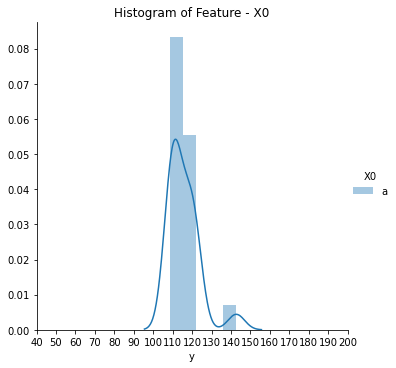

In [28]:
# histogram plot for random category under feature X0
sb.FacetGrid(data=car_data[car_data['X0']=='a'],hue='X0',size=5)\
            .map(sb.distplot,"y").add_legend() \
            .set(xticks=[40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])
plt.title('Histogram of Feature - X0')
plt.xlabel('y')
plt.show()

We will understand how this feature impacts the y value, we need to see how y value varies with each category under the feature.

let us see how the histogram plot looks for other categories as well

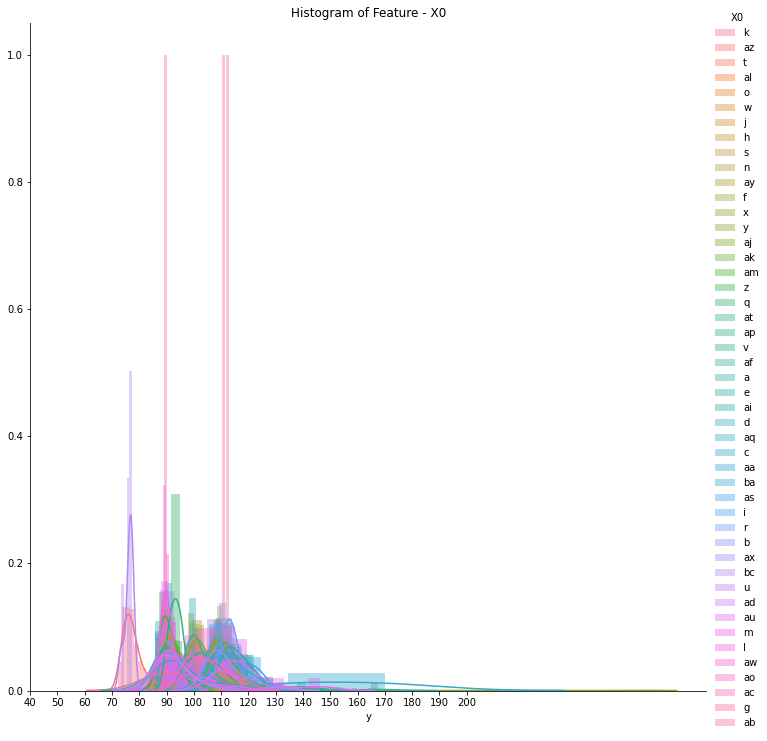

In [29]:
# Histogram plot for all categories under feature X0
sb.FacetGrid(data=car_data,hue='X0',size=10)\
            .map(sb.distplot,"y").add_legend() \
            .set(xticks=[40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])
plt.title('Histogram of Feature - X0')
plt.xlabel('y')
plt.show()

We see Histogram plots are not so helpful as there are lot of overlaps due to large number of categories.

Other Plots which help us visualize the impacts of categorical feature on a continuous variable is boxplot and violin plot. With boxplot we can see percentile value of distribution of y for each category, while with violin plot we can see the density distribution. We will plot both and see how feature X0 impacts y

#### Box plot

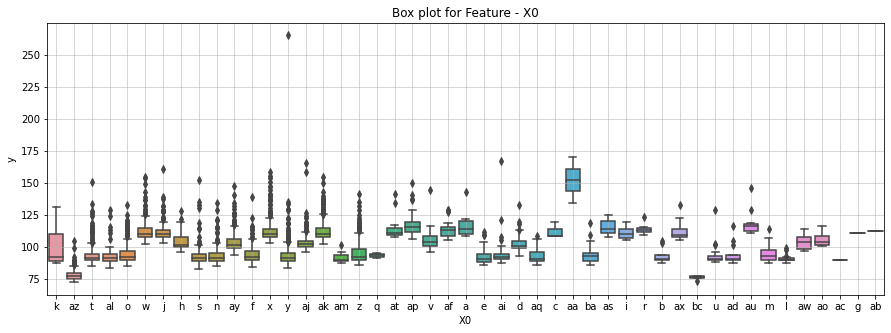

In [30]:
# Box plot of feature X0
plt.figure(figsize = (15,5))
sb.boxplot(x='X0', y = 'y', data=car_data)
plt.title('Box plot for Feature - X0')
plt.grid(linewidth = 0.5)
plt.show()

#### Violin plot

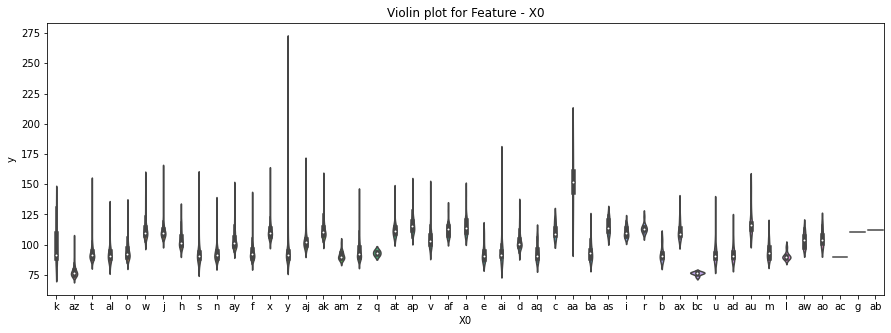

In [31]:
# Violin plot of feature X0
plt.figure(figsize = (15,5))
sb.violinplot(x='X0', y = 'y', data=car_data)
plt.title('Violin plot for Feature - X0')
plt.show()

We can see from both plots, that each category under the Feature X0 have different distribution of target value.
The IQR range occupy different regions for multiple categories. We can see which categories are probable reason for 3 peaks in the y value distribution.  

We see that there are lot of outliers when we consider this feature.

One of the observation from the box plot is that for category 'aa', the target value has distribution unique when compared to all other categories meaning it doesnt have overlapping distributions while other categories have some overlap.

Most of the categories have their majority population under y=125 but category 'aa' has y value above it. let us check the violin plot for this particular category

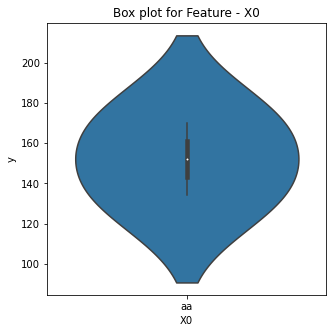

In [32]:
# Violin plot of category 'aa' under feature X0 
plt.figure(figsize = (5,5))
sb.violinplot(x='X0', y = 'y', data=car_data[car_data['X0']=='aa'])
plt.title('Box plot for Feature - X0')
plt.show()

We can see the distribution of category 'aa' is uniform with mean around 150 seconds.
Thus we can expect the car with feature X0 = 'aa' will have testing time in range ~[100,200]

In addition to above we have categories 'ac','ab' and 'g' which do not have distributions. These categories have single y values which are printed below.

In [33]:
# testing time of singled out categories 
car_data[(car_data['X0']=='ac') | (car_data['X0']=='ab') | (car_data['X0']=='g')][['X0','y']]

,X0,y
1621,ac,89.62
2173,g,110.75
2366,ab,112.30


We will check other features of these rows.

In [34]:
# other feature data of the above identified rows
car_data.iloc[[1621,2173,2366],:10]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8
1621,3250,89.62,ac,t,av,c,d,ad,a,l
2173,4346,110.75,g,c,au,c,d,k,j,n
2366,4742,112.30,ab,w,av,c,d,n,i,y


Though these 3 categoeries under X0 are used on only one car, we cannot say these are less data to train as there are other features which are same for these three cars. Thus these rows cannot be ignored.

#### Bar plot

We will now check counts of each category under the feature using bar plots to understand how many rows of data have particular category. 

This will help us understand if the feature has only one category for majority of the class (say >95% of data). 
Feature having one dominant category will not be useful feature as there are no variation in the feature. It would be a constant feature while target variable is varying.

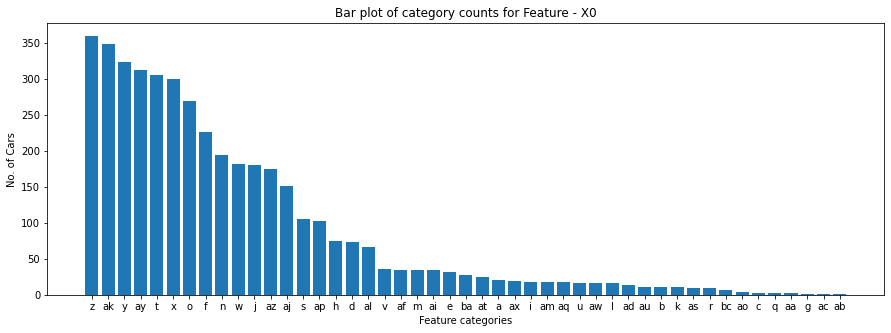

In [35]:
# Bar plot of categories vs Number of cars (rows) with particular category
plt.figure(figsize = (15,5))
plt.bar(car_data['X0'].value_counts().index,car_data['X0'].value_counts())
plt.title('Bar plot of category counts for Feature - X0')
plt.xlabel('Feature categories')
plt.ylabel('No. of Cars')
plt.show()

In bar plot we observe that there are multiple categories(15) which are applicable to good quantity of cars(>100). This feature doesnt have any particular category for majority of data.

#### Median plot

We will plot the median value of each category to see..

In [83]:
# Defining a function to plot medians of y distibution for a given category under selected feature column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
def plot_medians(feature):
    '''This function plots the medians of each category under the selected feature'''
     # median values are sorted
    cat_pd = car_data.groupby(feature)['y'].median().sort_values()
    
    # plotting categories vs sorted values
    plt.figure(figsize=(12,4))
    plt.plot(cat_pd)
    plt.xlabel('Feature category')
    plt.ylabel('Median value of y')
    plt.grid()
    plt.title('Median plot of Feature '+feature)
    plt.show()

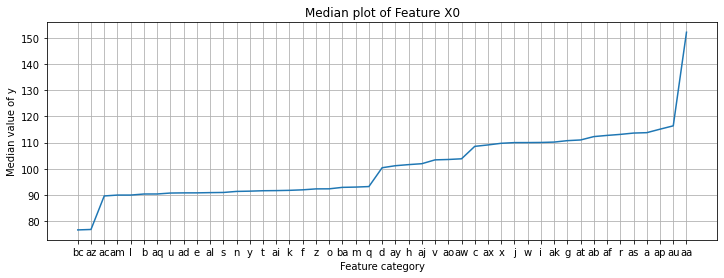

In [84]:
# median plot for feature 'X0'
plot_medians('X0')

From median plot we see that the each category differ in their median value of y.

The steps in graph gives ideas which particular categories are driving the three peaks we see in the histogram of 'y'

peaks and associated categories of X0:

75 sec - bc, az

90 sec - ac,l,am, b,aq,u,ad,e,al,s,n,y,t,ai,k,f,z,o,ba,m,q

110 sec - c,ax,x,j,w,i,ak,g,at,ab,af,r,as,a,ap,au,aa

in between 90 and 110 - d,ay,h,aj,v,ao,aw

#### Observations of feature X0:

- Box plot : Each category of features have distribution of its own for value of y (testing time)

- Category 'aa' under the feature has different distribution when compared to majority of categories

- Bar plot: All the categories of feature have specific count of cars for which they are applicable.
    Majority of data are covered by 22 out of 47 categories

- Median plot: Identifies feature categories which are associated with different peaks in distribution of 'y'

Thus we can see that feature 'X0' is a important feature in predicting the target value.  

Note: Box plot and Bar plots are visually informative compared to Violin and histogram plots. So we shall use Box plots and Bar plots to study the categorical features. We will consider violin and histogram plots when needed

Similar to 'X0' feature we will check other catogorical feature.

#### Feature X1

Feautre X1 is categorical feature. categories are listed below

In [38]:
# Unique values of feature 'X1'
car_data['X1'].unique()

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [39]:
# Number of unique values under feature 'X1'
len(car_data['X1'].unique())

27

X1 has 27 unique categories. Categories are set of letters and letter combination

#### Box plot

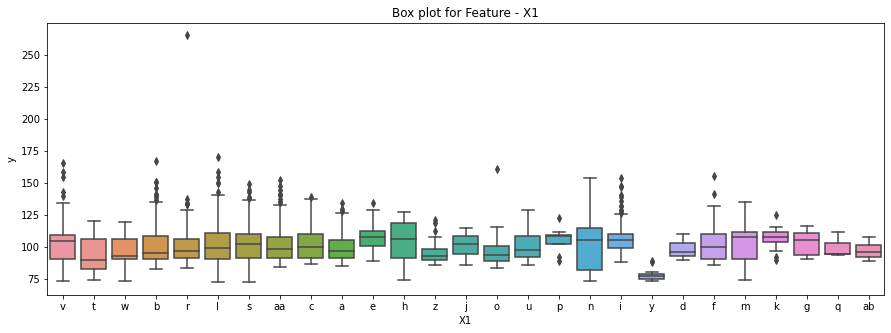

In [40]:
# Box plot of categories of feature 'X1' and testing time
plt.figure(figsize = (15,5))
sb.boxplot(x='X1', y = 'y', data=car_data)
plt.title('Box plot for Feature - X1')
plt.show()

Here we observe that though the all box plots are with in range ~ [75,160]. 

The distributions of population density is not same for all categories.

Here we can observe peculiar case for category 'y' which has values close to 75.

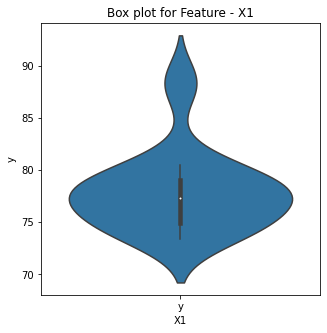

In [41]:
# Violin plot of category 'y' under feature 'X1'
plt.figure(figsize = (5,5))
sb.violinplot(x='X1', y = 'y', data=car_data[car_data['X1']=='y'])
plt.title('Box plot for Feature - X1')
plt.show()

#### Bar plot

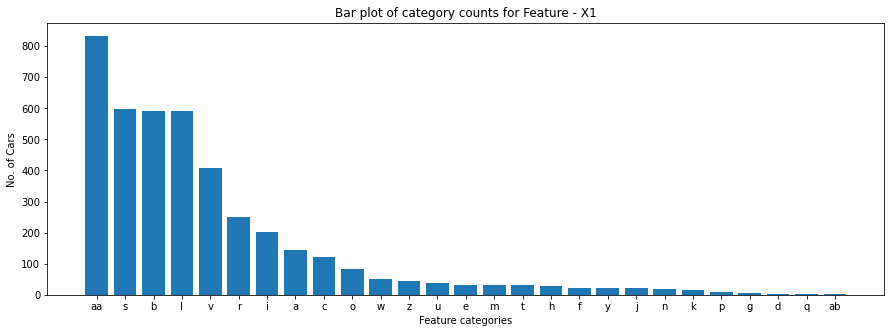

In [42]:
# Bar plot of categories of feature 'X1' and Number of cars having particular category
plt.figure(figsize = (15,5))
plt.bar(car_data['X1'].value_counts().index,car_data['X1'].value_counts())
plt.title('Bar plot of category counts for Feature - X1')
plt.xlabel('Feature categories')
plt.ylabel('No. of Cars')
plt.show()

This feature does not have any one particular category for most of the data.
Around 7 categories are individually used for more than 200 cars

#### Median plot

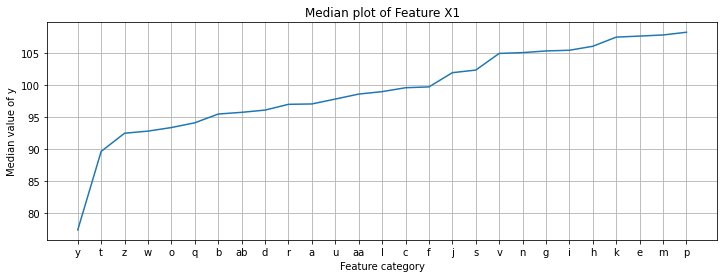

In [85]:
#line plot of median values of y for categories under feature 'X1' 
plot_medians('X1')

In Median plot we see that the each category differ in their median value of y.

Categories have their median in between 70 and 110 where each category are associated to medians in a increasing order  

#### Observations of feature X1:

- Box plot : Each category of features have distribution of its own for value of y (testing time)

- Category 'y' under the feature has different distribution when compared to majority of categories

- Bar plot: All the categories of feature have specific count of cars for which they are applicable.
    Majority of data are covered by 10 out of 27 categories

- Median plot: Identifies categories in increasing order of their median value. 

Thus we can see that feature 'X1' is a important feature in predicting the target value.  

From above plots we can see that feature 'X1' will be useful in predicting the target value.

#### Feature X2

Feautre X2 is categorical feature. categories are listed below

In [44]:
#Unique categories of features
car_data['X2'].unique()

array(['at', 'av', 'n', 'e', 'as', 'aq', 'r', 'ai', 'ak', 'm', 'a', 'k',
       'ae', 's', 'f', 'd', 'ag', 'ay', 'ac', 'ap', 'g', 'i', 'aw', 'y',
       'b', 'ao', 'al', 'h', 'x', 'au', 't', 'an', 'z', 'ah', 'p', 'am',
       'j', 'q', 'af', 'l', 'aa', 'c', 'o', 'ar'], dtype=object)

In [45]:
# Number of unique categories under feature 'X2'
len(car_data['X2'].unique())

44

X2 has 44 unique categories. Categories are set of letters and letter combinations.

#### Box plot

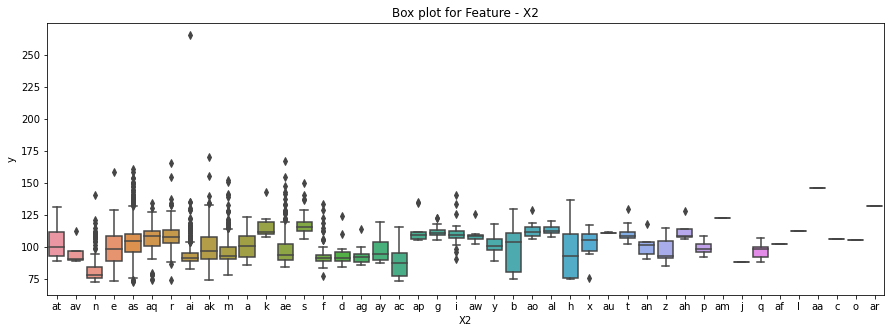

In [46]:
# Box plot of categories of feature 'X2' vs the testing time y
plt.figure(figsize = (15,5))
sb.boxplot(x='X2', y = 'y', data=car_data)
plt.title('Box plot for Feature - X2')
plt.show()

Feature X2 has distinct distribution of y for its categories. Here also we see lot of outliers. There are few categories which have fixed value(listed below)

In [47]:
# Categories identified with single value
car_data[(car_data['X2']=='am') | 
         (car_data['X2']=='j') | 
         (car_data['X2']=='af') |
         (car_data['X2']=='l') | 
         (car_data['X2']=='aa') | 
         (car_data['X2']=='c')| 
         (car_data['X2']=='o')| 
         (car_data['X2']=='ar')|
         (car_data['X2']=='au')][['X2','y']]

,X2,y
588,au,111.41
749,au,110.53
1250,am,122.51
1662,j,87.72
2168,af,102.30
2173,au,110.75
2724,l,112.08
3090,aa,146.30
3221,c,105.71
4116,o,105.29


Above identified single data point features have different categories under other feature(say X3) which are not unique to rows above (shown below). 

In [48]:
# Other features of above identified rows
car_data.iloc[[1250,1662,2168,2724,3090,3221,4116,4186,588,749,2173],:10]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8
1250,2479,122.51,x,aa,am,c,d,ab,e,s
1662,3334,87.72,t,aa,j,d,d,ad,l,m
2168,4337,102.30,z,v,af,c,d,k,g,x
2724,5442,112.08,j,a,l,b,d,m,g,b
3090,6208,146.30,au,b,aa,c,d,q,c,n
3221,6433,105.71,i,b,c,a,d,s,j,b
4116,8230,105.29,j,w,o,b,d,aa,j,g
4186,8371,131.98,j,f,ar,a,d,aa,j,n
588,1142,111.41,ap,v,au,c,d,c,j,t
749,1473,110.53,ap,v,au,c,d,af,j,t


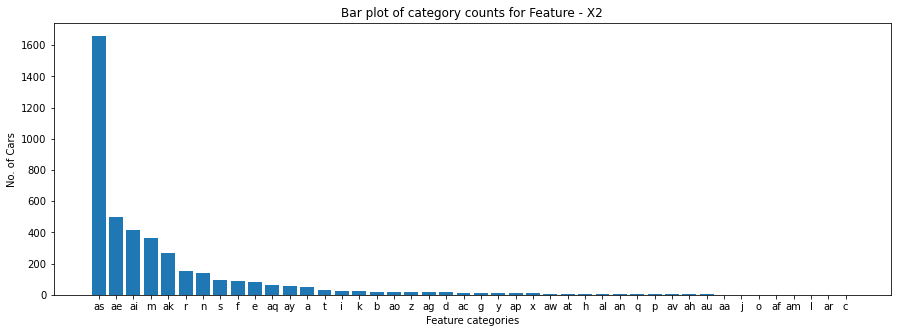

In [49]:
# Bar plot of categories of feature X2 vs Number of cars 
plt.figure(figsize = (15,5))
plt.bar(car_data['X2'].value_counts().index,car_data['X2'].value_counts())
plt.title('Bar plot of category counts for Feature - X2')
plt.xlabel('Feature categories')
plt.ylabel('No. of Cars')
plt.show()

For this feature there are one particular category 'as' which is applicable for large number of rows.
But only ~38%(1600/4209) of data are having category 'as'. Remaining 62% of data are distributed over multiple categories.

#### Median plot

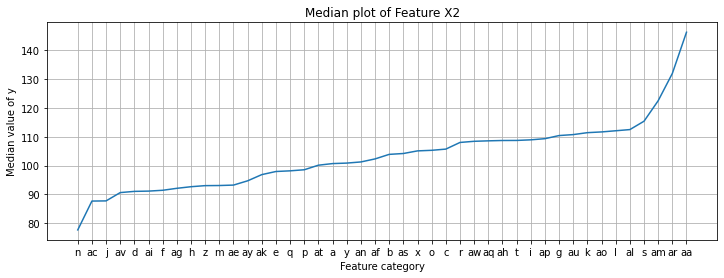

In [86]:
# line plot of median values of y for given category under feature X2
plot_medians('X2')

In Median plot we see that the each category differ in their median value of y.

This feature is quite similar to 'X0' because their are categories which have medians close to 75 ,90 sec and 110 sec.

#### Observations of feature X2:

- Box plot : Each category of features have distribution of its own for value of y (testing time)

- Bar plot: one particular category is applicable for 38% of cars. Remaining 43 categories contributes to 62% of data.

- Median plot: Identifies categories associated with y value peaks similar to feature X0. 

Thus we can see that feature 'X2' will be useful feature in predicting the target value.  

#### Feature X3

Feautre X3 is categorical feature. categories are listed below

In [51]:
# Unique categories of feature X3
car_data['X3'].unique()

array(['a', 'e', 'c', 'f', 'd', 'b', 'g'], dtype=object)

In [52]:
# Number of unique categories under feature X3
len(car_data['X3'].unique())

7

X3 has only 7 unique categories. Categories are set of letters

#### Box plot

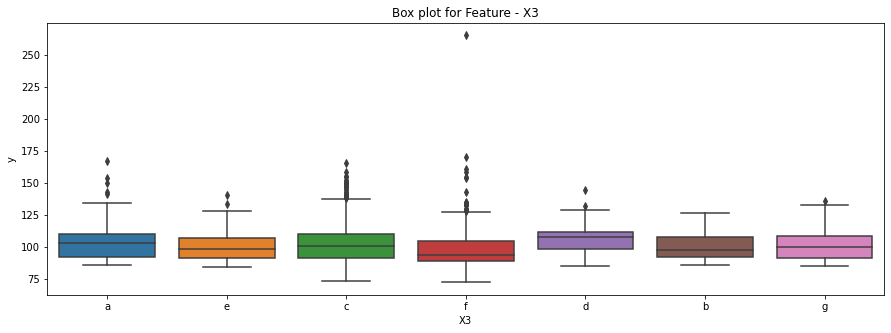

In [53]:
# Box plot of categories under feature X3 vs testing time y
plt.figure(figsize = (15,5))
sb.boxplot(x='X3', y = 'y', data=car_data)
plt.title('Box plot for Feature - X3')
plt.show()

Even though we see 25th and 75th percentile blocks are close by for multiple boxes the 50th percentile line vary. Thus each category have different distributions of y value. 

#### Bar plot

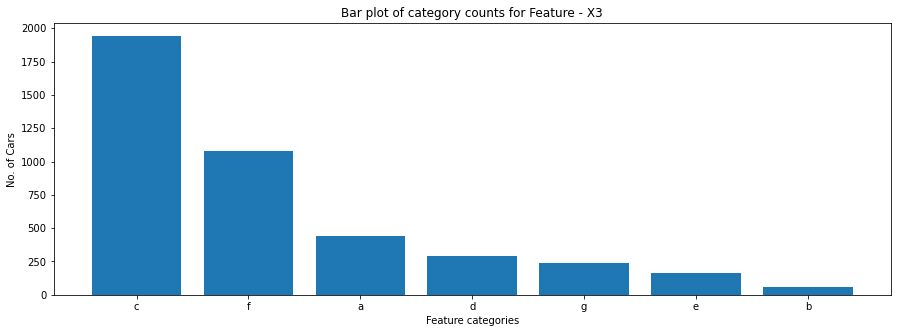

In [54]:
# Bar plot of categories under feature X3 vs Number of cars
plt.figure(figsize = (15,5))
plt.bar(car_data['X3'].value_counts().index,car_data['X3'].value_counts())
plt.title('Bar plot of category counts for Feature - X3')
plt.xlabel('Feature categories')
plt.ylabel('No. of Cars')
plt.show()

There are good number of cars with each category under feature X3

#### Median plot

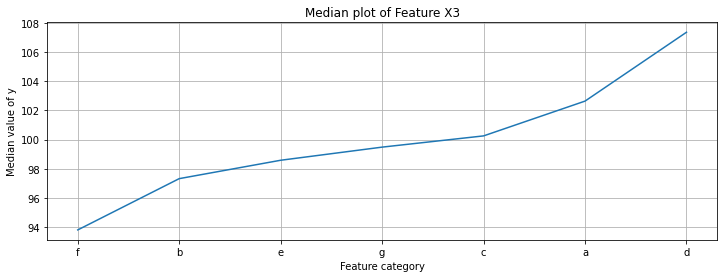

In [87]:
# line plot of medians of y value under given category of feature X3
plot_medians('X3')

In Median plot we see that the each category differ in their median value of y

#### Observations of feature X3:

- Box plot : The IQR values of different categories are closeby. But median values vary.

- Bar plot: All the categories of feature have specific count of cars for which they are applicable.

- Median plot: Identifies categories in increasing order of their median value. 

We see that feature 'X3' is a useful feature for the ML model to predict the target value.  

#### Feature X4

Feautre X4 is categorical feature. The Categories are listed below.

In [56]:
# unique categories of feature X4
car_data['X4'].unique()

array(['d', 'b', 'c', 'a'], dtype=object)

In [57]:
# size of unique categories of X4
len(car_data['X4'].unique())

4

X4 has only 4 unique categories. Categories are set of letters

#### Box plot

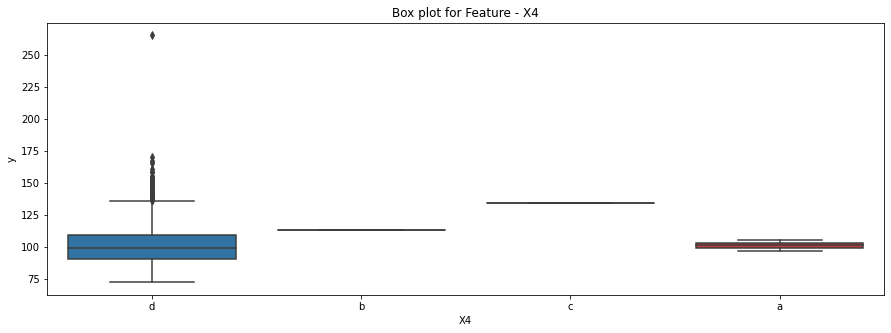

In [58]:
# Box plot of categories of feature X4 vs testing time y
plt.figure(figsize = (15,5))
sb.boxplot(x='X4', y = 'y', data=car_data)
plt.title('Box plot for Feature - X4')
plt.show()

#### Bar plot

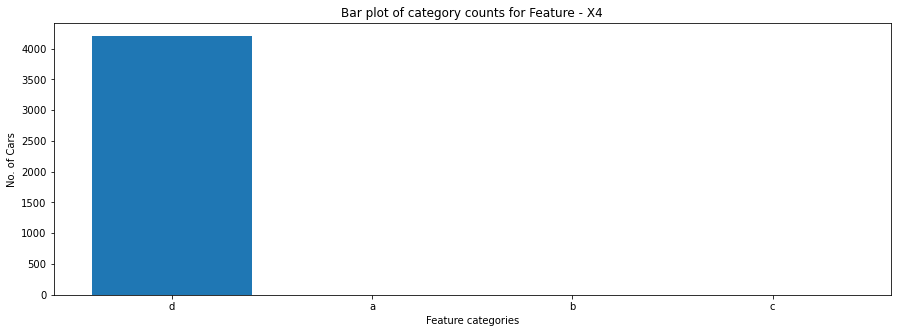

In [59]:
# Bar plot to capture categories of feature X4 vs Number of cars with particular category
plt.figure(figsize = (15,5))
plt.bar(car_data['X4'].value_counts().index,car_data['X4'].value_counts())
plt.title('Bar plot of category counts for Feature - X4')
plt.xlabel('Feature categories')
plt.ylabel('No. of Cars')
plt.show()

In [60]:
# y value of singled out categories of feature X4
car_data[(car_data['X4']=='a') | 
         (car_data['X4']=='b') |  
         (car_data['X4']=='c')][['X4','y']]

,X4,y
1307,b,112.80
1308,c,134.04
1309,a,96.69
1310,a,105.51


In [61]:
# other categotical features of above identified rows
car_data.iloc[[1307,1308,1309,1310],:10]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8
1307,2581,112.80,ap,l,s,c,b,ac,j,l
1308,2584,134.04,ak,e,ap,c,c,ac,j,j
1309,2585,96.69,z,r,ae,c,a,ac,a,s
1310,2586,105.51,aj,u,as,c,a,ac,d,n


These rows belong to specific category under X3 and X5. Similar to other features above we cannot ignore these rows.

In [62]:
# unique value counts of feature X4
car_data['X4'].value_counts()

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

#### Median plot

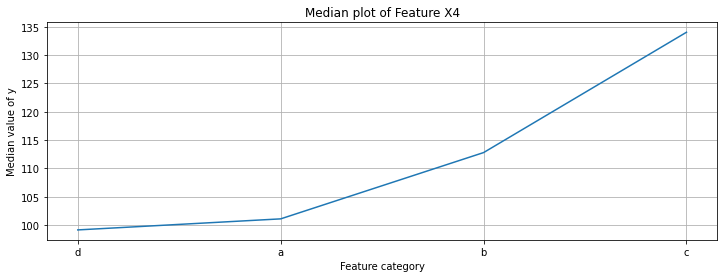

In [88]:
# line plot of median value of y for categories under feature X4  
plot_medians('X4')

In Median plot we see that dominant category ('d') has median value close to median of overall data.

#### Observations of feature X4:

- Box plot : Only one category has a plot.

- Bar plot: we have only category 'd' for majority of rows (4205 out of 4209). So this feature is constant across rows. 

This feature will NOT be useful in predicting target value as there is no variation in y with respect to categories of feature X4

#### Feature X5

Feautre X5 is categorical feature. The categories are listed below.

In [64]:
# unique categories of feature X5
car_data['X5'].unique()

array(['u', 'y', 'x', 'h', 'g', 'f', 'j', 'i', 'd', 'c', 'af', 'ag', 'ab',
       'ac', 'ad', 'ae', 'ah', 'l', 'k', 'n', 'm', 'p', 'q', 's', 'r',
       'v', 'w', 'o', 'aa'], dtype=object)

In [65]:
# size of unique categories under feature X5
len(car_data['X5'].unique())

29

X5 has only 29 unique categories. Categories are set of letters and letter combination

#### Box plot

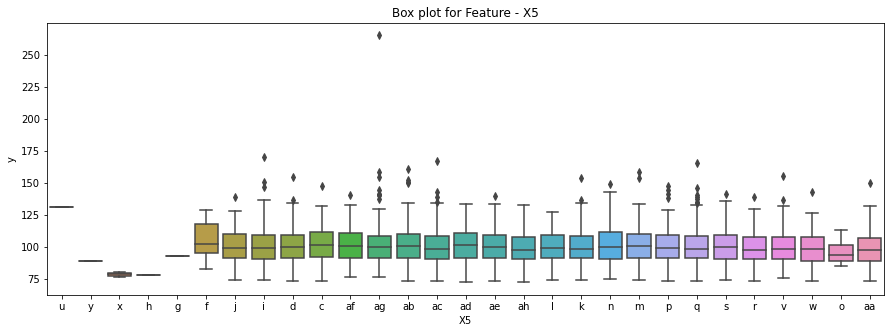

In [66]:
# Box plot of categories under feature X5 vs testing time y
plt.figure(figsize = (15,5))
sb.boxplot(x='X5', y = 'y', data=car_data)
plt.title('Box plot for Feature - X5')
plt.show()

This feature has distributions which ovelap for many categories except for category o and f,
while categories u,y,h and g has fixed values

Unlike other plots above this has pretty less outliers

In [67]:
# list of category which are singled out with their y value
car_data[(car_data['X5']=='u') | 
         (car_data['X5']=='y') |
         (car_data['X5']=='h') |
         (car_data['X5']=='g')][['X5','y']]

,X5,y
0,u,130.81
1,y,88.53
4,h,78.02
5,g,92.93


In [68]:
# other categorical features of above identified rows
car_data.iloc[[0,1,4,5],:10]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8
0,0,130.81,k,v,at,a,d,u,j,o
1,6,88.53,k,t,av,e,d,y,l,o
4,13,78.02,az,v,n,f,d,h,d,n
5,18,92.93,t,b,e,c,d,g,h,s


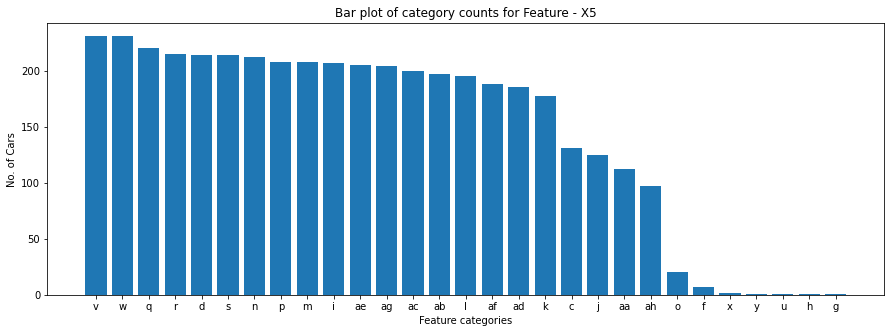

In [69]:
# Bar plot of categories of feature X5 vs Number of cars 
plt.figure(figsize = (15,5))
plt.bar(car_data['X5'].value_counts().index,car_data['X5'].value_counts())
plt.title('Bar plot of category counts for Feature - X5')
plt.xlabel('Feature categories')
plt.ylabel('No. of Cars')
plt.show()

This feature does not have any one particular category for most of the data. 

#### Median plot

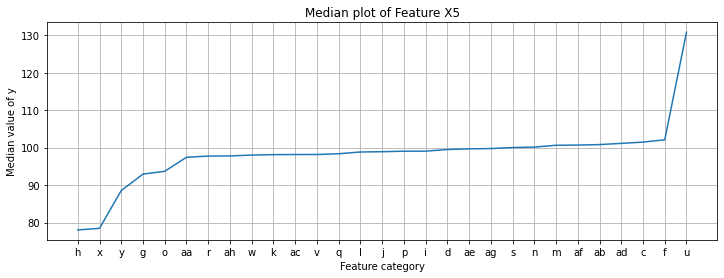

In [89]:
# line plot of median value of y under categories of feature X5
plot_medians('X5')

In Median plot we see that the each category differ in their median value of y

#### Observations of feature X5:

- Box plot : Majority of plots have IQR in the same range.

- Bar plot: All the categories of feature have specific count of cars, for which they are applicable. Majority of data are covered by 24 out of 29 categories

- Median plot: Unlike Feature X0 and X2, in X5, majority of categories have the medians concentrated around 100. It appears to be constant over categories. But we are looking at median of the distribution, so we cannot conclude that using any category in this feature will predict same value.

This feature might be helpful in predicting the scores which are close to 100.

We will check the feature importance of this feature by training a simple Random forest regressor model with only 7 encoded categorical features.

#### Feature X6

Feautre X6 is categorical feature. The categories are listed below.

In [71]:
# Unique value counts of feature X6
car_data['X6'].unique()

array(['j', 'l', 'd', 'h', 'i', 'a', 'g', 'c', 'k', 'e', 'f', 'b'],
      dtype=object)

In [72]:
# Size of unique categories of X6
len(car_data['X6'].unique())

12

X6 has only 12 unique categories. Categories are set of letters

#### Box plot

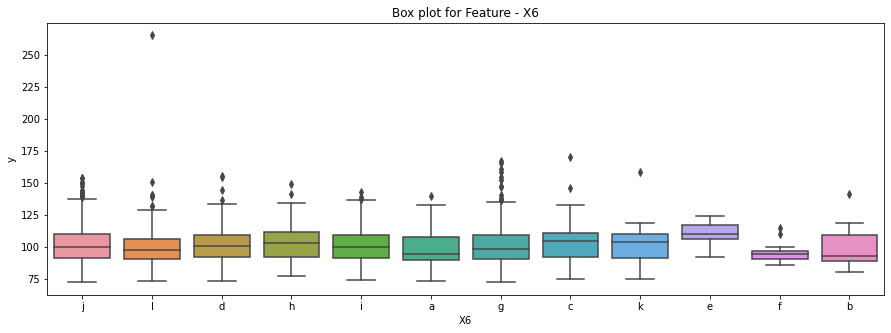

In [73]:
# Box plot of categories of feature X6 vs testing time y
plt.figure(figsize = (15,5))
sb.boxplot(x='X6', y = 'y', data=car_data)
plt.title('Box plot for Feature - X6')
plt.show()

Feature X6 has varying distributions for different categories even though 25th and 75th percentile of the plots are closeby. 

#### Bar plot

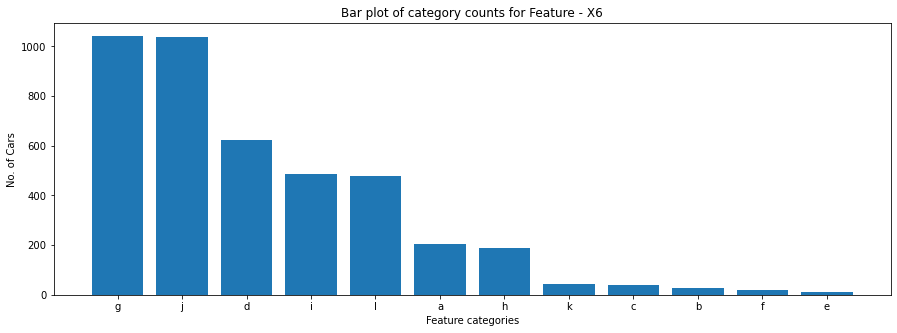

In [74]:
# Bar plot of categories of X6 vs Number of cars
plt.figure(figsize = (15,5))
plt.bar(car_data['X6'].value_counts().index,car_data['X6'].value_counts())
plt.title('Bar plot of category counts for Feature - X6')
plt.xlabel('Feature categories')
plt.ylabel('No. of Cars')
plt.show()

7 categories have car counts above 200. Thus the feature doesnt have any one dominant category. 

#### Median plot

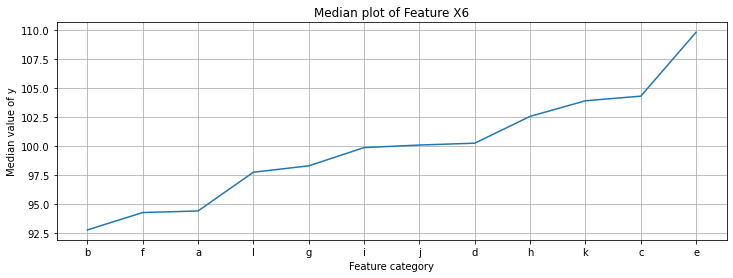

In [90]:
# line plot of median values of y for categories under feature X6
plot_medians('X6')

From median plot we see there is a linear relationship between this feature and target variable.

#### Observations of feature X6:

- Box plot : 2 categories ('e' and 'f') have small IQR range compared to other categories.

- Bar plot: All the categories of feature have specific count of cars for which they are applicable. 
    Majority of data are covered by 7 out of 12 categories.

- Median plot: Identifies categories in increasing order of their median value. 

We see that feature 'X6' is a useful feature for the ML model to predict the target value.  

#### Feature X8

Feautre X8 is categorical feature. categories are listed below

In [76]:
# unique categories of feature X8
car_data['X8'].unique()

array(['o', 'x', 'e', 'n', 's', 'a', 'h', 'p', 'm', 'k', 'd', 'i', 'v',
       'j', 'b', 'q', 'w', 'g', 'y', 'l', 'f', 'u', 'r', 't', 'c'],
      dtype=object)

In [77]:
# Number of unique values of feature X8
len(car_data['X8'].unique())

25

X8 has only 25 unique categories. Categories are set of letters

#### Box plot

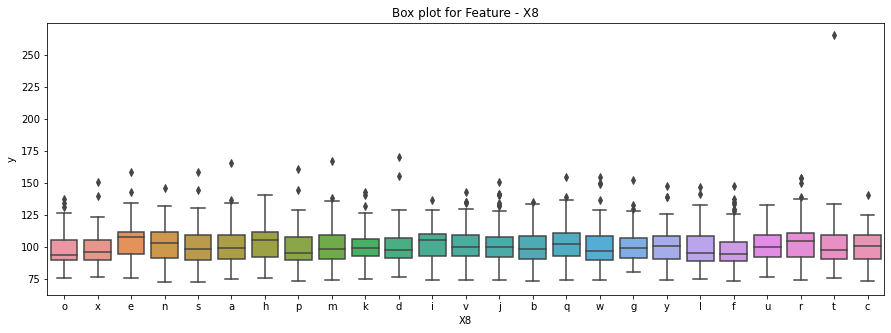

In [78]:
# Box plot of categories of feature X8 vs testing time y
plt.figure(figsize = (15,5))
sb.boxplot(x='X8', y = 'y', data=car_data)
plt.title('Box plot for Feature - X8')
plt.show()

Just like features X3 and X6, X8 has box plots lying in the close range but the distributions are different.
Thus it is useful feature.

Here also we see outliers are lesser

#### Bar plot

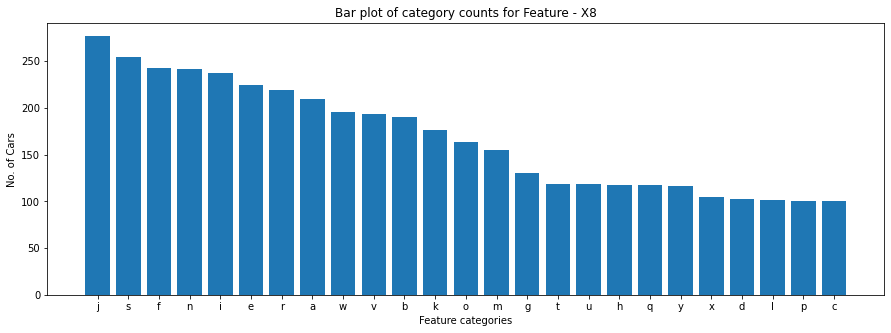

In [79]:
# Bar plot of categories under feature X8 vs Number of cars
plt.figure(figsize = (15,5))
plt.bar(car_data['X8'].value_counts().index,car_data['X8'].value_counts())
plt.title('Bar plot of category counts for Feature - X8')
plt.xlabel('Feature categories')
plt.ylabel('No. of Cars')
plt.show()

There are good distribution of data over the catogories in this feature. Each category have comparable number of cars to which they are associate with.

#### Median plot

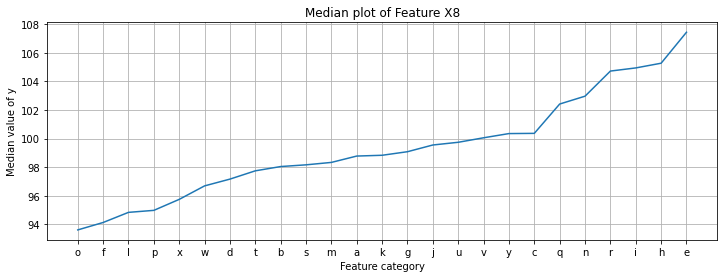

In [91]:
# line plot of median value of y for given category under feature X8
plot_medians('X8')

This feature has linear relationship with target varible when we compare the medians.

#### Observations of feature X8:

- Box plot : The IQR values of different categories are closeby. But median values vary.

- Bar plot: All the categories of feature have specific count of cars for which they are applicable. Each category have comparable car counts with one another.

- Median plot: Identifies categories in increasing order of their median value. 

Thus feature 'X8' is a useful feature for the ML model to predict the target value.  

As we see there is proportionality relationship between these categorical feature and the target variable.

We will consider Binary encoding and Target encoding methods to encode the above categorical features.

#### Bivarite analysis

Now we will check how two features together help us understand how data are distributed. We will check scatter plot of two feature X0 and X1       

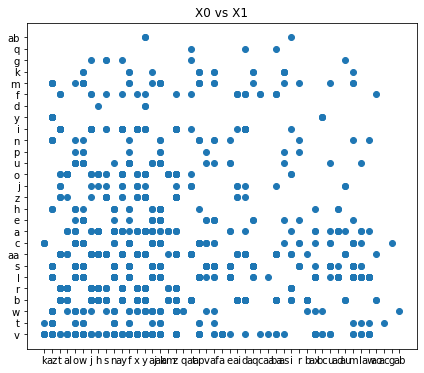

In [92]:
# scatter plot of feature X0 vs X1 
plt.figure(figsize=(7,6))
plt.scatter(car_data['X0'],car_data['X1'])
plt.title('X0 vs X1')
plt.show()

From above plot we observe that it is difficult to interpret data. So we will encode these features and check the correlation of the encoded features. Then we will plot multivariate plots of correlated feature.

For encoding data we will use target encoding. Target encoding gets mean value of target variable for given category under the feature and assigned to each category as feature value. Thus we will have numerical features.

In [93]:
# Targetencoder definition
X0_enc = ce.TargetEncoder()
X1_enc = ce.TargetEncoder()
X2_enc = ce.TargetEncoder()
X3_enc = ce.TargetEncoder()
X4_enc = ce.TargetEncoder()
X5_enc = ce.TargetEncoder()
X6_enc = ce.TargetEncoder()
X8_enc = ce.TargetEncoder()

In [94]:
# Fit and Transform of categorical features
X0_enc_df = X0_enc.fit_transform(car_data['X0'],car_data['y'])
X1_enc_df = X1_enc.fit_transform(car_data['X1'],car_data['y'])
X2_enc_df = X2_enc.fit_transform(car_data['X2'],car_data['y'])
X3_enc_df = X3_enc.fit_transform(car_data['X3'],car_data['y'])
X4_enc_df = X4_enc.fit_transform(car_data['X4'],car_data['y'])
X5_enc_df = X5_enc.fit_transform(car_data['X5'],car_data['y'])
X6_enc_df = X6_enc.fit_transform(car_data['X6'],car_data['y'])
X8_enc_df = X8_enc.fit_transform(car_data['X8'],car_data['y'])

In [95]:
# Combining encoded features
enc_df = pd.concat([X0_enc_df, X1_enc_df, X2_enc_df, X3_enc_df, X4_enc_df, X5_enc_df, X6_enc_df,X8_enc_df], axis = 1)

<AxesSubplot:>

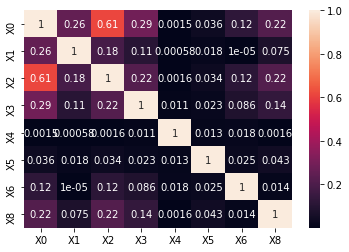

In [96]:
# Plotting heatmap of feature correlation
sb.heatmap(abs(enc_df.corr()),annot=True)
plt.title('Categorical feature correlation')
plt.show()

#### Multi Variate analysis of correlated feature

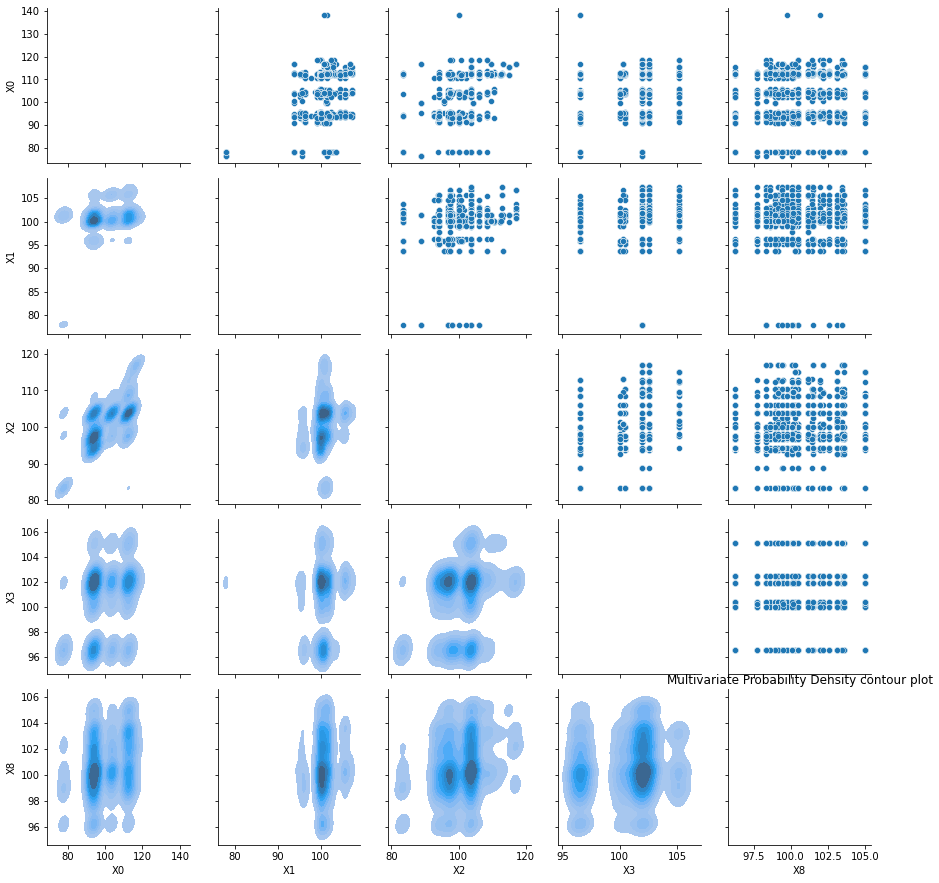

In [97]:
# pair plot of correlated features
feat_pair = sb.PairGrid(enc_df[['X0','X1','X2','X3','X8']])#car_data[list(car_data.columns[-8:])])
feat_pair.map_upper(sb.scatterplot)
feat_pair.map_lower(sb.kdeplot, fill = True)
feat_pair.map_diag(sb.scatterplot)
plt.title('Multivariate Probability Density contour plot')
plt.show()

Observation:
From above contour plot we see that selected features seperate out the regions of peak values of y.
Of all the features X2 vs X0 captures a relationship with distribution along a ~45 deg line. 
- Feature X2 mean values are concentrated more around 95 and 105 seconds.
- While mean values of feature X0 are distributed over 3 regions: around 90, 105 and above 110 

These two features will be helpful in predicting target varible y

##### As mentioned earlier, we will check the feature importance of categorical feature and their impact on r^2 score by training a simple Random forest regressor model with only 7 encoded categorical features in Feature engineering section.

#### Feature X10-X385

Features above X8 are all binary features.

Plotting Box plots, bar plots and pair plots to understand each feature impact on target varibale is cumbersome.

So we can plot Bar features together in single graph, capturing 0 and 1 counts of particular feature.

In [100]:
#Example value counts of particular feature
car_data[car_data.columns[10:][47]].value_counts()

1    2420
0    1789
Name: X58, dtype: int64

In [101]:
# order of values in numpy array
car_data[car_data.columns[10:][47]].value_counts().to_numpy()

array([2420, 1789], dtype=int64)

In [102]:
# order of values in numpy array when value counts are sorted
car_data[car_data.columns[10:][47]].value_counts().sort_index().to_numpy()

array([1789, 2420], dtype=int64)

#### For each feature X10 to X385 get the zero and one counts and store in dictionary

In [103]:
feature_dict = dict()
for feat in car_data.columns[10:]:
    # value counts of each binary feature is index sorted and saved in dictionary
    counts = car_data[feat].value_counts().sort_index().to_numpy()
    if len(counts)>1:
        feature_dict[feat] = counts

In [104]:
#create data frame of feature counts information
#sort the data along the column direction with respect to row 0
#This helps plotting in order
feature_dict_df = pd.DataFrame(data=feature_dict).sort_values(by = 0 , axis =1)

In [105]:
feature_dict_df

,X205,X74,X111,X361,X229,X128,X120,X263,X136,X61,...,X288,X42,X259,X260,X39,X339,X33,X270,X210,X295
0,1,3,106,143,168,175,178,181,183,194,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
1,4208,4206,4103,4066,4041,4034,4031,4028,4026,4015,...,1,1,1,1,1,1,1,1,1,1


In [106]:
#Store the counts information variables which will be used set the bar lengths for each feature
counts_zeros = feature_dict_df.iloc[0].to_numpy()
counts_ones = feature_dict_df.iloc[1].to_numpy()

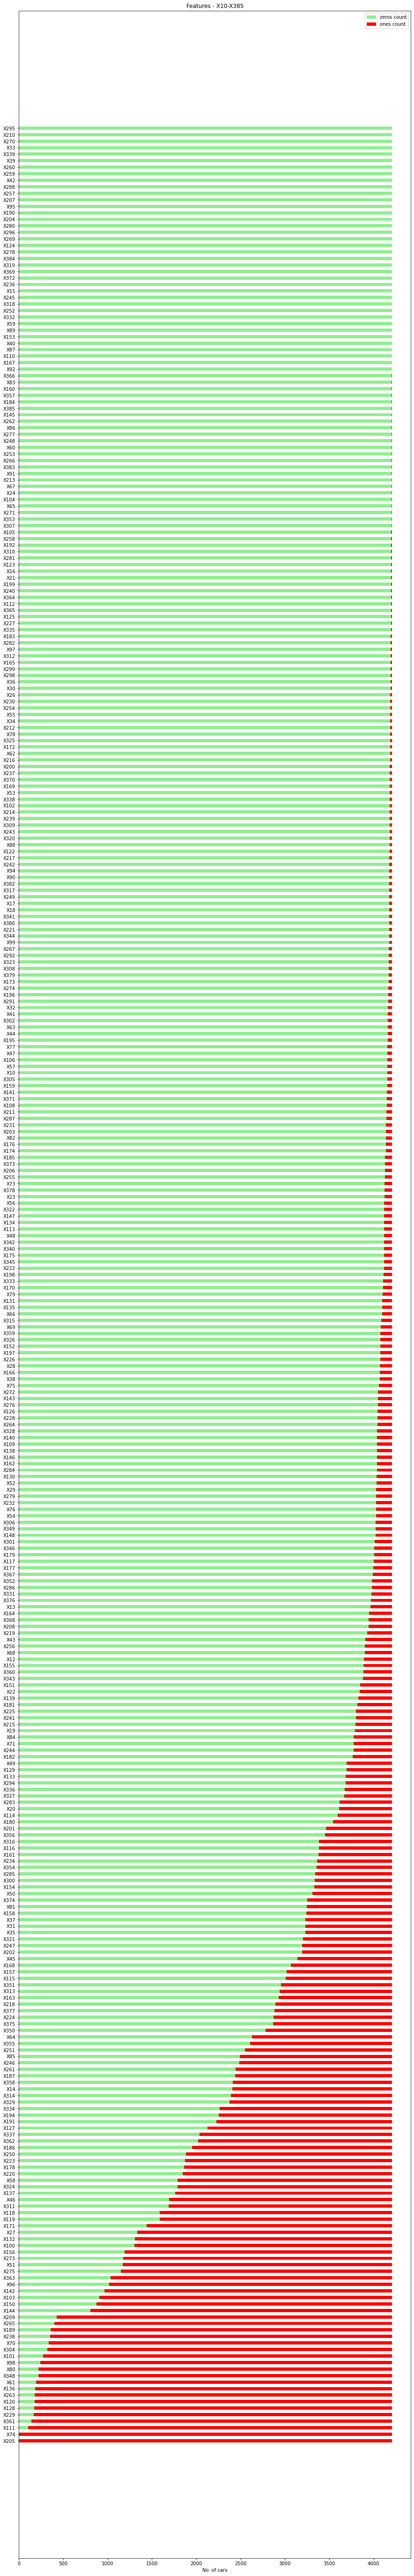

In [107]:
plt.figure(figsize = (15,100))
#horizontal bar to capture zeros count
plt.barh(feature_dict_df.columns,counts_zeros,height = 0.5,color ='lightgreen', label ='zeros count')

#horizontal bar to plot ones count captured right side of the graph.
plt.barh(feature_dict_df.columns,counts_ones,left =counts_zeros, height = 0.5,color ='red', label ='ones count')

plt.yticks(feature_dict_df.columns)
plt.xlabel('No. of cars')
plt.title('Features - X10-X385')
plt.legend()
plt.show()

#### Observations of feature X10- X385:

- Here we observe that there lot of features which have majority as zero counts. These features will not useful in predicting target variable as they remain same for majority of rows. 
- We will check the variance of these feature and reject the ones with low value. (Detailed in Feature Engineering section)

#### Duplicate feature check 

We will check for duplicate column using pandas attribute after transposing the dataframe. 

In [108]:
# Transposing the dataframe and selecting rows with duplicate features
# duplicated index will return true,thus the duplicate row will be displayed.
car_data.T[car_data.T.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,4199,4200,4201,4202,4203,4204,4205,4206,4207,4208
X35,1,1,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
X37,1,1,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
X39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X76,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X84,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
X93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X102,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
X107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


We can see that 56 feature are duplicates. These features can be removed as they are already represented by one similar feature.

### Observations from EDA

- Features ID and X4 can be removed as it has no impact on the target variable y.
- X0,X1,X2,X3,X5,X6 and X8 has impact on y. We can binary encode these features to feed into ML model.
- Features in range X10 to X385 will be filtered based on variance and correlation. feature which has variance<0.0125 and correlation > 0.9 with other features will be removed.
- We can remove 56 features which are duplicates.

### Performance metric:

To measure the performance of the model we need to compare its predictions with the ground truth. In the given dataset we have target variable 'y' which is continuous. For a continuous value prediction, we can evaluate Mean Square error/RMSE, Mean Absolute Error or R-squared (Coefficient of determintion) to check the performance of the model. As part of the kaggle competition, we need to evaluate Rsquared score. For the study we will consider additional metric RMSE to check model performance and compare different models.

Metrics considered for study:

- R Squared score

    $ R^2 = 1 - \frac{SS_r}{SS_t} $

    $ where $

    $ SS_r = \sum(y-ypred)^2 $

    $ SS_t = \sum(y-ymean)^2 $
     
    R^2 = 1 => Best model
    
    R^2 = 0 => Worst model, 
    The worst model will have SS_r = SS_t.
    
   
- Root Mean Squared Error
    
    $ RMSE = \sqrt{\frac{\sum(y-ypred)^2}{N}} $

    RMSE = 0 => Best model

    RMSE > high value  => worst model

Unlike Rsquared value we cannot tell how worst the model is by just looking at the RMSE value


### Feature Engineering

Here we will modify the feature based on the observation we made in EDA section.

#### We will remove features 'ID' and 'X4'

In [109]:
#Droping ID, X4 and y columns from feature data for further processing. y calues captured in another data frame.
car_data_new_X = car_data.drop(['ID','X4','y'],axis=1)
car_data_new_y = car_data['y']

In [110]:
car_data_new_y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

#### We will remove the 56 duplicate features

In [111]:
# Identifying the duplicate feature names and storing them in numpy array
duplicate_feat = car_data_new_X.T[car_data_new_X.T.duplicated()].index.to_numpy()

In [112]:
# Duplicate feature list and the count)
duplicate_feat,len(duplicate_feat)

(array(['X35', 'X37', 'X39', 'X76', 'X84', 'X93', 'X94', 'X102', 'X107',
        'X113', 'X119', 'X122', 'X134', 'X146', 'X147', 'X172', 'X199',
        'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X233',
        'X235', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247', 'X248',
        'X253', 'X254', 'X262', 'X266', 'X268', 'X279', 'X289', 'X290',
        'X293', 'X296', 'X297', 'X299', 'X302', 'X320', 'X324', 'X326',
        'X330', 'X347', 'X360', 'X364', 'X365', 'X382', 'X385'],
       dtype=object),
 56)

In [113]:
# Dropping Duplicate features from dataset
car_data_new_X = car_data_new_X.drop(duplicate_feat,axis=1)

### Train test split

The test data provided cannot be used to check the performance as it doesnt contain the target variable. 
Performance can be only be known by submitting model prediction of test data on kaggle. 
Our model needs to perform well on test data provided to us. For this we need to train our model with all the data.

But to check performance of a trained model ourself we need to test the model on unseen data. 
So we will split the data to train and test. We will consider 10% of train data provided to us as test data . 

Feature engineering will be done on train data. Test data will be unseen data for our model for which we can check the model perfromance.

In [114]:
from sklearn.model_selection import train_test_split

In [153]:
# Train test split of data after duplicate feature removal
X_train, X_test, y_train, y_test = train_test_split(car_data_new_X, 
                                                    car_data_new_y, 
                                                    test_size=0.1, 
                                                    random_state=42)

##### Feature Engineering of Train data

For further processing we will consider X_train

#### Variance check for Binary value features

In [154]:
# Evaluate variance of all binary features (column 7 and above in X_train data)
variance_data = X_train.iloc[:,7:].var()

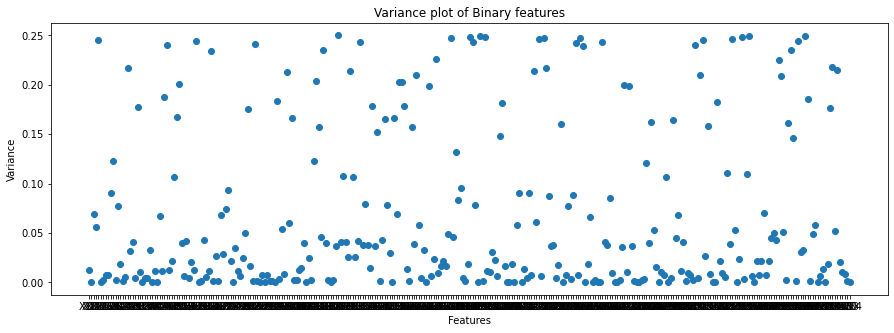

In [155]:
# Scatter plot of variance of each feature
plt.figure(figsize=(15,5))
plt.scatter(variance_data.index,variance_data)
plt.title('Variance plot of Binary features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.show()

From plot we can observe that there are lot of features which have variance close to zero(the inference we had in bar plot).
We will drop the features which have variance close to zero

Let us consider 5% of max variance as low variance threshold and see how is the distribution of 0s and 1s among the feature for the least variance feature.

In [156]:
# Max value of variance of features
variance_data.describe()['max']

0.2500542343352697

In [157]:
# Getting list of features which have variance value above 5% of max variance(0.25)
Feature_Bi_list = variance_data[variance_data>0.05*variance_data.describe()['max']].index

In [158]:
# list of selected features and their variance
X_train[Feature_Bi_list].var().sort_values()

X106    0.013029
X47     0.013029
X211    0.013543
X159    0.013543
X371    0.013799
          ...   
X186    0.248758
X191    0.249424
X362    0.249653
X337    0.249663
X127    0.250054
Length: 191, dtype: float64

In [159]:
# value count of least variance feature
X_train['X106'].value_counts()

0    3738
1      50
Name: X106, dtype: int64

In [160]:
# value count of max variance feature
X_train['X127'].value_counts()

0    1907
1    1881
Name: X127, dtype: int64

We are sure that feature category(0/1) will have population count of atleast 50.

In [161]:
# Getting list of features which have variance value below 5% of max variance(0.25) 
Feature_Bi_reject = variance_data[variance_data<0.05*variance_data.describe()['max']].index

In [162]:
# list of features to be rejected
Feature_Bi_reject

Index(['X10', 'X11', 'X15', 'X16', 'X17', 'X18', 'X21', 'X24', 'X26', 'X30',
       ...
       'X353', 'X357', 'X366', 'X369', 'X370', 'X372', 'X379', 'X380', 'X383',
       'X384'],
      dtype='object', length=121)

We will capture filtered features in variable car_data_X_train

In [163]:
# Droping Rejected from Train data
car_data_X_train = X_train.drop(Feature_Bi_reject,axis =1)

In [164]:
print('Number of Binary features droped for low variance : ',len(Feature_Bi_reject))

Number of Binary features droped for low variance :  121


### Feature Correlation

We need to check for features which are related each other as one of them will be redundant feature. One we to check the relationship two features is to find their correlation. We will evaluate pearson correlation of features available in pandas.
if correlation is in range [0,1] , then two features are linearly dependent on each other with positive slope,
else if correlation is in range [-1,0], then two features are linearly dependent on each other with negative slope,
if it is zero then there is no correlation. 

In [165]:
# correlation evaluation of filtered dataset
Correlation_mat = car_data_X_train.corr('pearson')

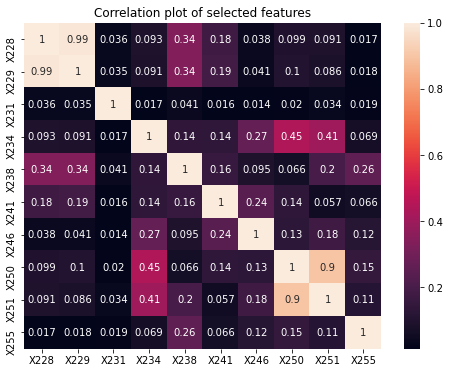

In [166]:
# Correlation heatmap on subset of features. Example plot as the feature size is large.
plt.figure(figsize=(8,6))
sb.heatmap(abs(Correlation_mat.iloc[120:130,120:130]),annot=True)
plt.title('Correlation plot of selected features')
plt.show()

We will list out features which have high correlation (>=0.9). For this we need to check only the lower or upper triangle of correlation matrix. For example in the above plot we will consider 'X229' which have 0.99 in the lower triangle and drop it from features list while retaining the feature 'X228'. Similarly feature 'X251' will be dropped.

In [167]:
def get_corr_features(corr_mat):
    '''This function returns feature list which have correlation above 0.9 for a given correlation matrix'''
    # list to store correlated features
    feature_correlated = []
    for i in range(len(corr_mat)):
        for j in range(i) : #This loop repeats only till one step before j=i, Thus captures information from
                            #lower triangle matrix. 
            if((corr_mat.iloc[i,j]>=0.9) and (corr_mat.columns[i] not in feature_correlated)):
                # features with correlation above 0.9 added to list. 
                feature_correlated.append(corr_mat.columns[i])
    return feature_correlated

In [168]:
# Correlation matrix of filtered train data passed to get_corr_features function to get list of features with high correlation.
feature_correlated = get_corr_features(Correlation_mat)

In [169]:
feature_correlated

['X54',
 'X66',
 'X101',
 'X120',
 'X129',
 'X137',
 'X140',
 'X150',
 'X162',
 'X166',
 'X194',
 'X198',
 'X215',
 'X238',
 'X250',
 'X251',
 'X263',
 'X264',
 'X265',
 'X272',
 'X276',
 'X311',
 'X314',
 'X328',
 'X346',
 'X348',
 'X352',
 'X358',
 'X362',
 'X363',
 'X367',
 'X368',
 'X371',
 'X378']

In [170]:
print('Number of features to be removed because of high correlation(>0.9):',len(feature_correlated))

Number of features to be removed because of high correlation(>0.9): 34


In [171]:
car_data_X_train = car_data_X_train.drop(feature_correlated,axis=1) 

In [172]:
print('Number of features after above feature removals : ',car_data_X_train.shape)

Number of features after above feature removals :  (3788, 164)


In [173]:
car_data_X_train.shape

(3788, 164)

In [174]:
car_data_X_train.iloc[:,7:]

,X12,X13,X14,X19,X20,X22,X23,X27,X28,X29,...,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377
1402,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3919,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3349,0,0,0,0,0,0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,1
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
393,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
466,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3092,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3772,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0


### Feature Filtering

As the number of Binary features are high, we will consider reducing number of features by selecting the features which help in improving the R^2 value of a ML model. We will consider random forest regressor model for the filtering. 
We will use 100 trees as estimators in Randomforest with max depth of 10 and min samples split count of 5 so as to avoid overfitting. The splitting criteria for trees is means squared error.
                                       
The features are initially assigned with uniform weights. 10 features are selected probabilistically based on their weights. The weights value are increased or decreased based on the feature impact on the scoring of the model. Score is mean of 3-fold cross validation score. When weights cross a threshold value, the feature is selected as best feature. This is repeated for 2000 epochs. We will end the loop if 100 features are selected before 2000 epochs

Reference for this approach of Forward feature selection:
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/36390

In [112]:
def feature_filter(data_X,data_Y,epochs):
    '''This function selects features based on its impact on R^2 score of a random forest regressor model'''
    # Creating Feature list of Binary features 
    feat_set = list(data_X.columns)
    feat_count = len(feat_set)
    feat_wts_dict = dict() #dictionary to store weights for each feature
    
    # Weight Threshold for feature selection
    feat_wt_threshold = 0.1
    
    # Initially assign uniform weights to each feature
    for feat in feat_set:
        feat_wts_dict[feat] = 1/feat_count
    
    scores = list()    
    best_features = list()   
    
    # increment factor to be added to weights when they improve the validation scores of the model
    # if there is no improvement, the weight is reduced by same factor
    feat_factor = 0.2
    
    for i in tqdm(range(epochs)):
    
        # Random feature selection based on their weights and without replacement
        random_feat = np.random.choice(feat_set, size=10, replace=False, p = list(feat_wts_dict.values()))    
        
        # Random forest regressor model definition
        X = data_X[random_feat]
        y = data_Y
        rf_clf = RandomForestRegressor(n_estimators=100,
                                       criterion='mse',
                                       max_depth=10,
                                       min_samples_split=5)
        
        # K fold Cross validation of the model
        score = np.mean(cross_val_score(rf_clf, X,y,cv = 3, scoring='r2',n_jobs=-1))
        scores.append(score)
        
        # Increasing / Decreasing weightage based on results cross validation from previous 25 iterations
        if (i>24):
            if score>np.mean(scores[-25:]):
                for feat in random_feat:
                    feat_wts_dict[feat] *= (1+feat_factor)
            
            else:
                for feat in random_feat:
                    feat_wts_dict[feat] *= (1-feat_factor)
            
            # normalize feature weights after modifying the feature weights based on scoring 
            wt_sum = sum(feat_wts_dict.values())
            for feat in feat_set:
                feat_wts_dict[feat] /= wt_sum
        
        # Adding feature to Best feature list
        if max(feat_wts_dict.values())> feat_wt_threshold:
            
            # list of features which has weights more than threshold are considered as best features
            for feat in feat_set:
                if feat_wts_dict[feat] > feat_wt_threshold:
                    #adding feature to best feature list
                    best_features.append(feat)
        
                    # remove best features from feat_set and corresponding weights for next iteration
                    feat_set.remove(feat)
                    del feat_wts_dict[feat]
            
            # update feature weights after removing the best features from feature set
            wt_sum = sum(feat_wts_dict.values())
            for feat in feat_set:
                feat_wts_dict[feat] /= wt_sum
            
        if (len(best_features)>99):
            print('100 features are selected as Best Features.\nFeature Selection loop terminated...')
            break
    
    print('Number of features selected after %d epochs are : %d' %(i+1,len(best_features)))
    
    return best_features,scores

In [114]:
# Getting the best binary features from car_data_X_train using feature filter which is run for 2000 epochs
best_features,scores = feature_filter(car_data_X_train.iloc[:,7:],y_train,2000)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [07:52<00:00,  4.24it/s]

Number of features selected after 2000 epochs are : 95


#### Best features selected from above iteration

In [115]:
print('Best Binary features :', best_features)

Best Binary features : ['X189', 'X261', 'X127', 'X313', 'X316', 'X29', 'X136', 'X128', 'X191', 'X350', 'X157', 'X159', 'X234', 'X275', 'X171', 'X156', 'X178', 'X31', 'X315', 'X118', 'X48', 'X148', 'X223', 'X103', 'X185', 'X28', 'X43', 'X334', 'X186', 'X224', 'X187', 'X14', 'X132', 'X51', 'X80', 'X256', 'X46', 'X108', 'X300', 'X286', 'X47', 'X218', 'X180', 'X337', 'X100', 'X64', 'X377', 'X354', 'X168', 'X158', 'X163', 'X273', 'X114', 'X246', 'X304', 'X351', 'X179', 'X45', 'X115', 'X155', 'X19', 'X202', 'X12', 'X126', 'X49', 'X355', 'X349', 'X336', 'X151', 'X98', 'X331', 'X81', 'X142', 'X130', 'X306', 'X22', 'X69', 'X96', 'X111', 'X220', 'X376', 'X68', 'X13', 'X75', 'X85', 'X343', 'X255', 'X203', 'X71', 'X197', 'X61', 'X301', 'X285', 'X27', 'X208']


In [175]:
best_features = ['X189', 'X261', 'X127', 'X313', 'X316', 'X29', 'X136', 'X128', 'X191', 'X350', 'X157', 'X159', 'X234', 'X275', 'X171', 'X156', 'X178', 'X31', 'X315', 'X118', 'X48', 'X148', 'X223', 'X103', 'X185', 'X28', 'X43', 'X334', 'X186', 'X224', 'X187', 'X14', 'X132', 'X51', 'X80', 'X256', 'X46', 'X108', 'X300', 'X286', 'X47', 'X218', 'X180', 'X337', 'X100', 'X64', 'X377', 'X354', 'X168', 'X158', 'X163', 'X273', 'X114', 'X246', 'X304', 'X351', 'X179', 'X45', 'X115', 'X155', 'X19', 'X202', 'X12', 'X126', 'X49', 'X355', 'X349', 'X336', 'X151', 'X98', 'X331', 'X81', 'X142', 'X130', 'X306', 'X22', 'X69', 'X96', 'X111', 'X220', 'X376', 'X68', 'X13', 'X75', 'X85', 'X343', 'X255', 'X203', 'X71', 'X197', 'X61', 'X301', 'X285', 'X27', 'X208']

In [176]:
# List of features which are rejected
feature_filter_rejected = car_data_X_train.iloc[:,7:].drop(best_features,axis =1).columns
feature_filter_rejected

Index(['X20', 'X23', 'X38', 'X50', 'X52', 'X56', 'X58', 'X70', 'X73', 'X79',
       'X82', 'X106', 'X109', 'X116', 'X117', 'X131', 'X133', 'X135', 'X138',
       'X139', 'X141', 'X143', 'X144', 'X152', 'X154', 'X161', 'X164', 'X170',
       'X174', 'X175', 'X176', 'X177', 'X181', 'X182', 'X201', 'X206', 'X209',
       'X211', 'X219', 'X225', 'X228', 'X229', 'X231', 'X241', 'X283', 'X284',
       'X287', 'X294', 'X321', 'X322', 'X327', 'X329', 'X333', 'X340', 'X342',
       'X345', 'X356', 'X359', 'X361', 'X373', 'X374', 'X375'],
      dtype='object')

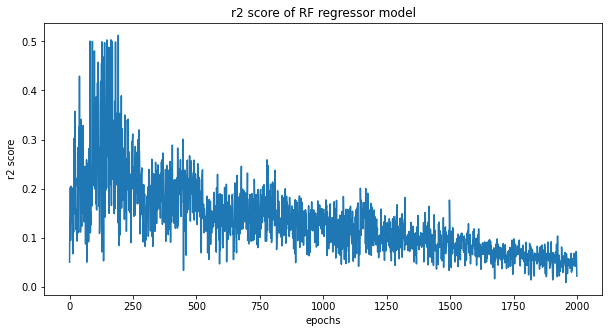

In [118]:
# Ploting r^2 score of the random forest model value each epoch.
plt.figure(figsize=(10,5))
plt.plot(scores)
plt.xlabel('epochs')
plt.ylabel('r2 score')
plt.title('r2 score of RF regressor model')
plt.show()

Here we see that r2 score decrease as number of epochs increase. We can infer that number features which have high impact on score reduces with number of epochs.

Feature which gives score above 0.3 are selected within 500 epochs.

#### r2 score of the random forest model with best binary feature

In [177]:
# Model Definition
rf_clf = RandomForestRegressor(n_estimators=100,
                               criterion='mse',
                               max_depth=10,
                               min_samples_split=5)

In [178]:
# Fitting the model only for best binary features.
rf_clf.fit(car_data_X_train[best_features],y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5)

In [179]:
# capturing feature and its importance from regressor model in pandas series
feat_imp = pd.Series(rf_clf.feature_importances_ ,index = best_features).sort_values()

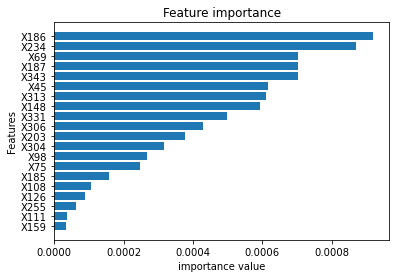

In [180]:
# Ploting feature importance in bar chart
plt.barh(feat_imp.index[:20],feat_imp.iloc[:20])
plt.xlabel('importance value')
plt.ylabel('Features')
plt.title('Feature importance')
plt.show()

#### Train data r2 score

In [181]:
# Evaluating R^2 score for the predictions of above model on train data
r2_score(y_train, rf_clf.predict(car_data_X_train[best_features]))

0.6570098037288328

#### Validation score

In [182]:
# Evaluating r2 score through cross validation of above model
score = np.mean(cross_val_score(rf_clf,car_data_X_train[best_features],y_train,cv = 3, scoring='r2'))
score

0.5345562465076396

#### The above score can be considered as Baseline. 

#### Combining the categorical features with selected best features

In [183]:
# Concatenating Best binary features with categorical features
car_data_X_train = pd.concat([car_data_X_train.iloc[:,0:7],car_data_X_train[best_features]],axis=1)
car_data_X_train.head()

,X0,X1,X2,X3,X5,X6,X8,X189,X261,X127,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
1402,j,aa,as,a,ac,d,e,1,1,0,...,0,0,0,0,0,1,0,0,1,0
3919,n,l,as,f,w,l,d,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3349,w,c,n,c,s,j,w,1,1,0,...,0,0,0,1,0,0,0,0,1,0
174,d,aa,y,d,i,i,i,0,1,0,...,1,1,0,0,0,1,0,0,0,0
393,as,p,as,c,d,d,s,1,0,0,...,0,0,0,0,0,1,0,0,1,1


### Binary encoding of categorical features

All categorical feature needs to be encoded such that it can be fed into ML model.

We will consider Binary encoding of these features.

In [184]:
# Binary Encoder Definition for categorical feature. 
# drop_invariant set to true to avoid generating columns with no variance
Bi_encoder_X0 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X1 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X2 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X3 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X4 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X5 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X6 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X8 = ce.BinaryEncoder(drop_invariant=True)

Fit and transform of features X0,X1,X2,X3,X4,X5,X6 and X8

In [185]:
# Fitting encoder and Transforming the categorical feature in train data
X0_bi = Bi_encoder_X0.fit_transform(car_data_X_train['X0'])
X1_bi = Bi_encoder_X1.fit_transform(car_data_X_train['X1'])
X2_bi = Bi_encoder_X2.fit_transform(car_data_X_train['X2'])
X3_bi = Bi_encoder_X3.fit_transform(car_data_X_train['X3'])
# feature X4 is not considered. Refer EDA section
X5_bi = Bi_encoder_X5.fit_transform(car_data_X_train['X5'])
X6_bi = Bi_encoder_X6.fit_transform(car_data_X_train['X6'])
X8_bi = Bi_encoder_X8.fit_transform(car_data_X_train['X8'])

In [186]:
X0_bi.shape[1]+X1_bi.shape[1]+X2_bi.shape[1]+X3_bi.shape[1]+X5_bi.shape[1]+X6_bi.shape[1]+X8_bi.shape[1]

34

We have 34 features generated based on categorical features

#### New Dataframe to capture Encoded categorical feature with Filtered Binary features  

In [187]:
# Contcatenating encoded feature with binary features
car_data_X_train = pd.concat([X0_bi,X1_bi,X2_bi,X3_bi,X5_bi,X6_bi,X8_bi,car_data_X_train.iloc[:,7:]],axis=1)
car_data_X_train.head()

,X0_1,X0_2,X0_3,X0_4,X0_5,X0_6,X1_1,X1_2,X1_3,X1_4,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
1402,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3919,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3349,0,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
174,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
393,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1


In [150]:
# Final size of filtered and encoded train data
car_data_X_train.shape

(3788, 134)

After Binary Feature filter and Feature encoding of train data, we have 134 features

In [132]:
car_data_X_train.to_csv('data_filter_encode.csv')

#### Importance of Encoded features

In EDA section, we had made note on training Random forest model to predict time based on categorical features which are encoded.

We will study importance of Encoded features and impact on r^2 score of the model in this section.

In [209]:
car_data_X_train.iloc[:,0:34]

,X0_1,X0_2,X0_3,X0_4,X0_5,X0_6,X1_1,X1_2,X1_3,X1_4,...,X5_5,X6_1,X6_2,X6_3,X6_4,X8_1,X8_2,X8_3,X8_4,X8_5
1402,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3919,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3349,0,0,0,0,1,1,0,0,0,1,...,1,0,0,1,1,0,0,0,1,1
174,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
393,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0,0,0,0,1,0,0,1,1,...,1,0,0,1,0,0,1,0,0,1
466,0,1,0,1,1,0,1,1,0,0,...,1,0,0,1,1,0,1,1,1,0
3092,0,0,1,0,1,1,1,0,1,1,...,1,0,1,0,0,1,0,1,0,0
3772,0,0,1,0,1,1,0,1,1,0,...,0,0,1,0,0,0,0,1,1,1


We will train a random forest regressor model to understand their importance

In [210]:
# Random forest Model definition 
rf_clf_enc = RandomForestRegressor(n_estimators=100,
                                   criterion='mse',
                                   max_depth=10,
                                   min_samples_split=5)

In [211]:
# Fitting the model on Binary encoded features only
rf_clf_enc.fit(car_data_X_train.iloc[:,0:34],y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5)

In [212]:
# Capturing the feature importance of Binary encoded features in pandas series
feat_imp_enc = pd.Series(rf_clf_enc.feature_importances_ ,index = car_data_X_train.iloc[:,0:34].columns).sort_values()

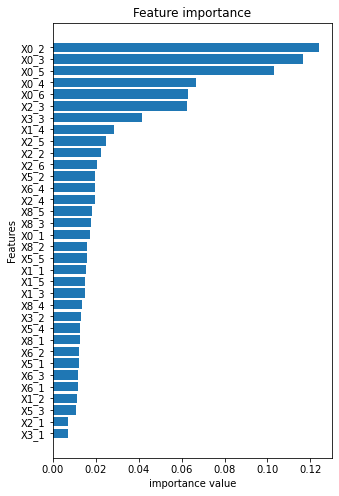

In [213]:
# Feature importance plot of Binary encoded features
plt.figure(figsize=(5,8))
plt.barh(feat_imp_enc.index,feat_imp_enc.iloc)
plt.xlabel('importance value')
plt.ylabel('Features')
plt.title('Feature importance')
plt.show()

We can observe top important features are X0 and X2. other features X3,X5,X6 and X8 do have importance in contribution which is not insignificant.

Thus we will not remove any encoded feature.

#### Binary Encoded Feature Train data r2 score

In [214]:
# r2 score evaluation on train data for model with encoded feature alone
r2_score(y_train, rf_clf_enc.predict(car_data_X_train.iloc[:,0:34]))

0.7371697310058912

#### Binary Encoded Feature Validation score

In [215]:
# Cross validation score evaluation for model with encoded feature
score = np.mean(cross_val_score(rf_clf_enc,car_data_X_train.iloc[:,0:34],y_train,cv = 3, scoring='r2'))
score

0.4745690752505074

When we consider encoded feature alone, model fits on the train data better than the best binary features selected earlier
but the validation score is lower

In [190]:
car_data_X_train.iloc[:,34:]

,X189,X261,X127,X313,X316,X29,X136,X128,X191,X350,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
1402,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,1,0
3919,1,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3349,1,1,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
174,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
393,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,1,1,0,0,1,0
466,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,1,1,0
3092,1,0,1,1,0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3772,1,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,1,1,0,1,0


### Target Encoding of categorical Features

Target encoder assigns the mean value of target variable y grouped under each category of a given feature

In [196]:
# Target Encoder definition
X0_encdr = ce.TargetEncoder()
X1_encdr = ce.TargetEncoder()
X2_encdr = ce.TargetEncoder()
X3_encdr = ce.TargetEncoder()
X5_encdr = ce.TargetEncoder()
X6_encdr = ce.TargetEncoder()
X8_encdr = ce.TargetEncoder()

In [197]:
# Fit and Transform train data using the above encoder
X0_enc_ft = X0_encdr.fit_transform(X_train['X0'],y_train)
X1_enc_ft = X1_encdr.fit_transform(X_train['X1'],y_train)
X2_enc_ft = X2_encdr.fit_transform(X_train['X2'],y_train)
X3_enc_ft = X3_encdr.fit_transform(X_train['X3'],y_train)
X5_enc_ft = X5_encdr.fit_transform(X_train['X5'],y_train)
X6_enc_ft = X6_encdr.fit_transform(X_train['X6'],y_train)
X8_enc_ft = X8_encdr.fit_transform(X_train['X8'],y_train)

In [198]:
car_data_X_train_enc = pd.concat([X0_enc_ft, X1_enc_ft, X2_enc_ft, X3_enc_ft, X5_enc_ft, X6_enc_ft,X8_enc_ft,car_data_X_train.iloc[:,34:]], axis = 1)

In [199]:
car_data_X_train_enc

,X0,X1,X2,X3,X5,X6,X8,X189,X261,X127,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
1402,112.288742,99.945179,103.626021,102.735089,99.719670,101.571511,105.223590,1,1,0,...,0,0,0,0,0,1,0,0,1,0
3919,93.683729,100.869759,103.626021,96.598811,98.849083,99.060070,99.632268,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3349,112.494485,101.863670,83.250813,101.832682,99.920410,100.819827,99.117814,1,1,0,...,0,0,0,1,0,0,0,0,1,0
174,102.759403,99.945179,101.986832,105.186126,101.370167,101.089616,103.155370,0,1,0,...,1,1,0,0,0,1,0,0,0,0
393,115.347184,105.567232,103.626021,101.832682,100.675231,101.571511,99.307468,1,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,112.288742,105.576778,103.626021,101.832682,98.550106,99.060070,103.708238,1,1,0,...,0,0,0,0,1,1,0,0,1,0
466,77.951635,77.979048,98.284737,101.832682,100.675231,100.819827,100.829839,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3092,94.193841,95.226279,97.506460,101.832682,101.148141,101.089616,99.821868,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3772,94.193841,100.068772,100.176504,96.598811,99.941311,101.089616,99.256824,1,0,1,...,0,0,0,0,0,1,1,0,1,0


In [201]:
car_data_X_train_enc.to_csv('data_filter_tg_encode.csv')

Similar to Binary encoding, we will train a random forest regressor model to understand importance of target encoding.

In [202]:
# Random forest Model definition 
rf_clf_tgenc = RandomForestRegressor(n_estimators=100,
                                   criterion='mse',
                                   max_depth=10,
                                   min_samples_split=5)

In [203]:
# Fitting the model on target encoded features only
rf_clf_tgenc.fit(car_data_X_train_enc.iloc[:,0:7],y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5)

In [204]:
# Capturing the feature importance of target encoded features in pandas series
feat_imp_tgenc = pd.Series(rf_clf_tgenc.feature_importances_ ,index = car_data_X_train_enc.iloc[:,0:7].columns).sort_values()

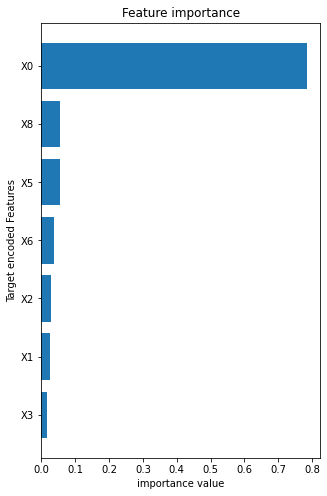

In [205]:
# Feature importance plot of target encoded features
plt.figure(figsize=(5,8))
plt.barh(feat_imp_tgenc.index,feat_imp_tgenc.iloc)
plt.xlabel('importance value')
plt.ylabel('Target encoded Features')
plt.title('Feature importance')
plt.show()

We can observe top important features are X0 and X8 while X3 is least among the Seven categorical features. Other features X1,X2,X3,X5 and X6 do have importance in contribution which is not insignificant.

We will consider all the 7 categorical features for model training.

#### Target Encoded Feature Train data r2 score

In [206]:
# r2 score evaluation on train data for model with encoded feature alone
r2_score(y_train, rf_clf_tgenc.predict(car_data_X_train_enc.iloc[:,0:7]))

0.721190811755195

#### Target Encoded Feature Validation score

In [207]:
# Cross validation score evaluation for model with encoded feature
score = np.mean(cross_val_score(rf_clf_tgenc,car_data_X_train_enc.iloc[:,0:7],y_train,cv = 3, scoring='r2'))
score

0.5361288253188806

From Cross validation we observe that it is better than Binary encoded feature. 

We will train Seperate models for Target encoded and Binary encoded data.

### Local Outlier Factor

We will study if the given data has outliers.
We will evaluate local outlier factor for each row and list out which has value far away from one (LOF>>|1|)

LOF of Xi = (Average LRD of Neighbours of Xi)/ (LRD of Xi)

where,

LRD = Local Reachability density = (Number of neigbours of given point / sum of reachability distances)

reachability distance = max distance of neighbour from a given point.

LRD signifies how crowded is the neighbourhood of the selected point.
When LRD is high for neighbours and comparitively lesser for a given point then the given point is probably outlier.

We will consider 10 neighbours to a given data point to evaluate LOF value

In [265]:
from sklearn.neighbors import LocalOutlierFactor

In [266]:
# defining LOF evaluator function and predicting outliers
LOF_clf = LocalOutlierFactor(n_neighbors=10)
LOF_pred = LOF_clf.fit_predict(car_data_X_train_enc,y_train)

In [278]:
# Storing identified outlier rows by the LOF classifier
outlier_car_row = []
for i in range(len(car_data_X_train_enc)):
    if LOF_pred[i] == -1 :
        outlier_car_row.append(i)
print('Outliers index identified by model fit_predict :\n',outlier_car_row)

Outliers index identified by model fit_predict :
 [12, 21, 22, 69, 70, 90, 94, 120, 129, 133, 139, 142, 153, 159, 165, 193, 195, 202, 207, 211, 255, 256, 311, 325, 329, 334, 364, 390, 398, 405, 415, 424, 431, 433, 437, 438, 465, 475, 481, 497, 527, 539, 546, 554, 556, 557, 559, 586, 590, 610, 613, 678, 687, 690, 696, 704, 705, 716, 722, 736, 749, 761, 763, 776, 783, 784, 787, 788, 794, 808, 841, 843, 860, 863, 871, 882, 918, 920, 949, 954, 971, 974, 975, 999, 1015, 1045, 1056, 1064, 1073, 1077, 1078, 1082, 1095, 1097, 1120, 1139, 1146, 1159, 1179, 1198, 1228, 1229, 1233, 1240, 1268, 1281, 1286, 1352, 1361, 1423, 1426, 1431, 1450, 1455, 1457, 1483, 1490, 1497, 1510, 1561, 1574, 1597, 1606, 1647, 1682, 1713, 1714, 1732, 1748, 1778, 1783, 1791, 1846, 1849, 1865, 1871, 1881, 1907, 1916, 1921, 1937, 1959, 1987, 2029, 2030, 2054, 2057, 2080, 2090, 2114, 2115, 2119, 2121, 2124, 2134, 2136, 2147, 2154, 2161, 2163, 2172, 2175, 2192, 2194, 2198, 2213, 2217, 2233, 2237, 2273, 2281, 2285, 2319, 23

In [268]:
max(abs(LOF_clf.negative_outlier_factor_))

5.126875903719425

#### We will check the rows which have LOF  (negative_outlier_factor_) < -1.5 

In [279]:
# Identifying outlier based on negative outlier factor and storing in a dictionary with absolute outlier factor value
outlier_car = dict()
for i in range(len(car_data_X_train_enc)):
    if LOF_clf.negative_outlier_factor_[i]<-1.5:
        outlier_car[i] = abs(LOF_clf.negative_outlier_factor_[i])

In [280]:
# list of outliers based on negative outlier factor
outlier_car.keys()

dict_keys([12, 21, 22, 69, 70, 90, 94, 120, 129, 133, 139, 142, 153, 159, 165, 193, 195, 202, 207, 211, 255, 256, 311, 325, 329, 334, 364, 390, 398, 405, 415, 424, 431, 433, 437, 438, 465, 475, 481, 497, 527, 539, 546, 554, 556, 557, 559, 586, 590, 610, 613, 678, 687, 690, 696, 704, 705, 716, 722, 736, 749, 761, 763, 776, 783, 784, 787, 788, 794, 808, 841, 843, 860, 863, 871, 882, 918, 920, 949, 954, 971, 974, 975, 999, 1015, 1045, 1056, 1064, 1073, 1077, 1078, 1082, 1095, 1097, 1120, 1139, 1146, 1159, 1179, 1198, 1228, 1229, 1233, 1240, 1268, 1281, 1286, 1352, 1361, 1423, 1426, 1431, 1450, 1455, 1457, 1483, 1490, 1497, 1510, 1561, 1574, 1597, 1606, 1647, 1682, 1713, 1714, 1732, 1748, 1778, 1783, 1791, 1846, 1849, 1865, 1871, 1881, 1907, 1916, 1921, 1937, 1959, 1987, 2029, 2030, 2054, 2057, 2080, 2090, 2114, 2115, 2119, 2121, 2124, 2134, 2136, 2147, 2154, 2161, 2163, 2172, 2175, 2192, 2194, 2198, 2213, 2217, 2233, 2237, 2273, 2281, 2285, 2319, 2331, 2356, 2369, 2379, 2383, 2392, 2403, 

In [271]:
len(outlier_car_row),len(outlier_car)

(285, 285)

#### It is observed that both fit predict and negative outlier factor (<-1.5) identifies same set of outliers

In [272]:
# listing outlier car values
LOF = np.array(list(outlier_car.values()))

In [273]:
#Sorting outlier factor values
LOF.sort()

In [274]:
LOF

array([1.50001932, 1.50125303, 1.5028108 , 1.50373333, 1.50473266,
       1.50889471, 1.5090426 , 1.51175253, 1.5125446 , 1.51363139,
       1.51422371, 1.51549409, 1.51931543, 1.51959843, 1.51960792,
       1.52371375, 1.52484955, 1.52665214, 1.52879407, 1.52949443,
       1.53145522, 1.53193759, 1.53202745, 1.53252747, 1.53270193,
       1.53376504, 1.5341301 , 1.53573785, 1.53784907, 1.53784907,
       1.5418663 , 1.5453535 , 1.54756492, 1.54800584, 1.5490429 ,
       1.55153628, 1.55476405, 1.55749908, 1.55971928, 1.56185905,
       1.56294659, 1.56298448, 1.56753118, 1.56828778, 1.56828778,
       1.5689704 , 1.57036717, 1.57231164, 1.57250451, 1.57498875,
       1.57611483, 1.57687218, 1.57707542, 1.57712122, 1.57822068,
       1.57982876, 1.58177927, 1.58491081, 1.58492824, 1.58501108,
       1.58609845, 1.58674975, 1.58678005, 1.58981817, 1.58987576,
       1.59344329, 1.59378382, 1.59394427, 1.59412792, 1.59515779,
       1.59786655, 1.59787843, 1.60299527, 1.60317049, 1.60317

Max y value among outliers

In [275]:
# maximum value of testing time among the outliers
max(y_train.iloc[list(outlier_car.keys())])

169.91

Observed: One with max testing time which is far away from mean testing time is not considered as outlier by the LOF calculation

In [276]:
# maximum value of testing time of all train data
max(y_train)

265.32

In [281]:
# car data with maximum testing time 
car_data_X_train[y_train == max(y_train)]

,X0_1,X0_2,X0_3,X0_4,X0_5,X0_6,X1_1,X1_2,X1_3,X1_4,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
883,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,0


In [282]:
# Outlier factor of row 883 (y = 265sec)
LOF_pred[883],LOF_clf.negative_outlier_factor_[883]

(1, -0.9822437295439885)

During Model construction, We will train one model with outlier and same model without outliers. And see how it affects the r2 score.

### Dimensionality reduction

We will consider Matrix decomposition of feature matrix using PCA,SVD and ICA techniques.

With these techniques data is transformed to new set of dimensions which have basis vector that are orthogonal/independent to eachother.
  
We will consider number of components as 20 for each of the reduction techniques and do fit and transform on filtered and target encoded features. 

And Finally combine all 60 features(20x3) as our new features of our data. We will check and remove correlated features. These filtered set of feature will be used for model training.

Ref https://www.kaggle.com/hakeem/stacked-then-averaged-models-0-5697

#### PCA

In [218]:
# Principal Component Analysis definition, fit and transform of filtered and target encoded feature data
pca = PCA(n_components = 20)
car_data_pca = pca.fit_transform(car_data_X_train_enc)

In [219]:
# Shape of the PCA trasnformed data
car_data_pca.shape

(3788, 20)

In [220]:
# Percentage of total variance of original data explained by 20 PCA components
sum(pca.explained_variance_ratio_)

0.980250595862871

In [221]:
# Example of PCA transformed data 
car_data_pca[0]

array([ 1.22077218e+01,  2.13648007e+00, -1.36665798e+00,  2.18925005e+00,
        3.79838042e+00,  6.99178074e-01,  9.78609998e-01, -3.65715763e-01,
        1.34946402e+00,  7.14218840e-01, -4.66102007e-01,  4.36752529e-01,
       -4.19620941e-01, -2.52204808e-02, -5.23244899e-01,  6.75130533e-01,
        4.16648882e-02,  6.94630692e-03,  7.17032484e-01, -3.08505448e-01])

In [222]:
# column names for the newly generated PCA components
pca_col = [('pca_'+str(i)) for i in range(20)]

In [223]:
# Storing the pca data in pandas data frame
dim_redn_feat_1 = pd.DataFrame(car_data_pca,columns=pca_col)

#### truncated SVD

In [227]:
# truncated SVD definition, fit and transform of filtered and target encoded feature data
tSVD = TruncatedSVD(n_components = 20)
car_data_tsvd = tSVD.fit_transform(car_data_X_train_enc)

In [228]:
# Percentage of total variance of original data explained by 20 tSVD components
sum(tSVD.explained_variance_ratio_)

0.9801067339240183

In [229]:
# Example of tSVD transformed data 
car_data_tsvd[0]

array([ 2.74120929e+02,  9.25198803e+00,  2.15223381e+00,  2.40473581e+00,
        2.37693638e+00,  2.79501381e+00,  1.06168355e+00, -4.86976501e-01,
       -1.20740247e+00,  9.46209360e-01, -5.76229314e-01,  4.58146859e-01,
       -4.21783902e-01, -4.99330059e-02, -5.28744556e-01,  6.69601574e-01,
       -6.09110098e-02, -8.02124097e-03,  7.12838562e-01, -3.08064355e-01])

In [230]:
# column names for the newly generated tSVD components
tSVD_col = [('tSVD_'+str(i)) for i in range(20)]

In [231]:
# Storing the tSVD data in pandas data frame
dim_redn_feat_2 = pd.DataFrame(car_data_tsvd,columns=tSVD_col)

#### ICA

In [232]:
# Independent Component Analysis definition, fit and target transform of filtered and target encoded feature data
F_ica = FastICA(n_components = 20)
car_data_fica = F_ica.fit_transform(car_data_X_train_enc)

In [233]:
# column names for the newly generated ICA components
ica_col = [('ica_'+str(i)) for i in range(20)]

In [234]:
# Storing the FastICA data in pandas data frame
dim_redn_feat_3 = pd.DataFrame(car_data_fica,columns=ica_col)

Combining all dimensionally reduced features

In [235]:
# Concatenating the PCA, tSVD and FastICA components 
dim_redn_feat = pd.concat([dim_redn_feat_1,
                           dim_redn_feat_2,
                           dim_redn_feat_3],axis=1)

In [236]:
# Shape of combined Dimensionaly reduced features
dim_redn_feat.shape

(3788, 60)

In [237]:
# Finding correlated features among Dimensionally reduced features
Dim_redn_corr_feat = get_corr_features(dim_redn_feat.corr())
Dim_redn_corr_feat

['tSVD_0',
 'tSVD_1',
 'tSVD_2',
 'tSVD_3',
 'tSVD_7',
 'tSVD_9',
 'tSVD_10',
 'tSVD_11',
 'tSVD_12',
 'tSVD_14',
 'tSVD_15',
 'tSVD_17',
 'tSVD_18',
 'tSVD_19']

In [238]:
# removing features which have high correlation
car_data_dim_redn = dim_redn_feat.drop(Dim_redn_corr_feat,axis=1)

In [239]:
# Final Dimsionality reduction features
car_data_dim_redn

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,ica_10,ica_11,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19
0,12.207722,2.136480,-1.366658,2.189250,3.798380,0.699178,0.978610,-0.365716,1.349464,0.714219,...,0.001639,0.008511,-0.001698,-0.021410,-0.000873,-0.032125,-0.006753,0.002176,0.000643,-0.011925
1,-5.302281,-5.854219,3.434329,-2.111297,-0.178771,1.849639,-1.427259,-0.579287,0.478980,-0.718630,...,-0.013950,-0.024471,0.023867,0.020716,0.018231,0.011476,-0.024151,0.008131,-0.010809,0.007366
2,3.360905,20.787223,-1.076568,-0.639483,-0.899242,0.883341,1.039217,-0.197269,-2.351549,2.004730,...,0.008698,0.013437,-0.001169,0.015070,-0.071511,0.000752,-0.012681,0.012239,-0.004747,-0.003353
3,3.015384,-0.463924,-3.736619,2.833444,1.210653,-0.737563,-0.293060,0.839013,0.470770,-0.131682,...,-0.009352,-0.026260,-0.026785,-0.006489,-0.002843,0.015798,0.005545,0.011615,0.020580,-0.001638
4,14.922860,3.642875,-1.505016,-3.789266,-1.876235,0.110670,0.920941,0.564891,-1.322797,0.922728,...,-0.004417,0.007481,0.002158,0.017755,-0.005875,0.002227,-0.008084,0.013388,0.021546,-0.006223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,12.411194,2.308943,-2.628933,-3.671095,2.347412,2.198216,-1.967564,-0.318017,1.588128,1.134225,...,-0.013113,0.006670,0.005505,-0.014862,-0.001862,-0.029467,-0.023037,0.017242,-0.013243,0.016408
3784,-22.702822,-8.139357,4.814382,20.374838,1.053457,-0.197028,1.065107,-1.852710,-1.780118,2.993850,...,-0.010242,-0.009083,0.008163,-0.003253,0.010449,-0.006382,-0.002440,0.017310,-0.010893,0.020265
3785,-7.482684,-0.015436,0.655267,5.239734,-0.931910,-0.520507,-0.021507,0.410069,0.617671,-0.509626,...,-0.019644,-0.029738,-0.004916,-0.008541,-0.035905,0.009050,0.007947,-0.005516,0.002312,0.007180
3786,-6.397553,-2.402460,3.478616,-1.184748,-0.483426,0.566276,-0.011551,0.858389,1.589461,0.040450,...,0.009812,-0.006779,-0.001674,-0.013383,-0.002924,-0.011705,-0.001061,-0.008310,-0.009906,0.008554


In [240]:
# Feature list of dimensionality reduction data
car_data_dim_redn.columns

Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7',
       'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13', 'pca_14',
       'pca_15', 'pca_16', 'pca_17', 'pca_18', 'pca_19', 'tSVD_4', 'tSVD_5',
       'tSVD_6', 'tSVD_8', 'tSVD_13', 'tSVD_16', 'ica_0', 'ica_1', 'ica_2',
       'ica_3', 'ica_4', 'ica_5', 'ica_6', 'ica_7', 'ica_8', 'ica_9', 'ica_10',
       'ica_11', 'ica_12', 'ica_13', 'ica_14', 'ica_15', 'ica_16', 'ica_17',
       'ica_18', 'ica_19'],
      dtype='object')

Only few tSVD components are considered with new set of features after correlation check 

#### 2 and 3 way interaction of binary features

We will check if there are any two or three feature interactions that have correlation with the target variable.
Here we will make use of combinations module from itertools to generate list of 2 and 3 combinations of feature names. 

We iterate over the generated list to add values of particular combination of features and then check its correlation with the target variable. feature combination with correlation above 0.65 are considered as new feature(based on reference below).

Ref https://medium.com/analytics-vidhya/detailed-solution-to-mercedes-benz-green-manufacturing-competition-on-kaggle-7b85c84a3ff5

For creating the combination we will consider all the features before filtering based on variance, correlation and encoding (X_train) as there might be correlation to target variable when they are combined with others even though feature variance is low.

In [241]:
# capturing the binary features from X_train data (data before filtering operations)
car_data_bi_ft = X_train.iloc[:,7:]

In [242]:
car_data_bi_ft

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
1402,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3919,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
393,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
466,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3772,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [243]:
# listing out column names of binary feature.
Binary_ft = car_data_bi_ft.columns

In [244]:
# Generating tuples of two and three feature combination using column names 
two_feat_combi = list(combinations(Binary_ft,2))
three_feat_combi = list(combinations(Binary_ft,3))

In [245]:
print('Number of possible two feature combination: ',len(two_feat_combi))
print('Number of possible three feature combination: ',len(three_feat_combi))

Number of possible two feature combination:  48516
Number of possible three feature combination:  5013320


In [246]:
# Examples of 2 and 3 feature combinations
two_feat_combi[:2],three_feat_combi[:2]

([('X10', 'X11'), ('X10', 'X12')],
 [('X10', 'X11', 'X12'), ('X10', 'X11', 'X13')])

#### Two way feature interaction

In [182]:
# Evaluating correlation between two feature combinations and target value
two_ft = dict()
for i,j in tqdm(two_feat_combi):
    two_ft_corr = (car_data_bi_ft[i]+car_data_bi_ft[j]).corr(y_train)
    if(two_ft_corr>0.65):
        two_ft[i+'_'+j] = two_ft_corr

100%|██████████████████████████████████████████████████████████████████████████| 47586/47586 [00:25<00:00, 1878.71it/s]


In [183]:
# list of identified 2 feature combinations
two_ft

{'X136_X314': 0.6535845567652394,
 'X263_X314': 0.6582783696750025,
 'X314_X315': 0.6584270395369155}

In [247]:
#hardcoded list as backup
two_feat_selc = ['X136_X314',#: 0.6587693114637183,
                 'X263_X314',#: 0.6630212818971395,
                 'X314_X315']#: 0.6659108718978796}

In [248]:
# Generating dataframe for selected 2 feature combinations 
two_feat_dict = dict()
for feat in two_feat_selc:
    ft_list = feat.split('_')
    two_feat_dict[feat] = car_data_bi_ft[ft_list[0]]+car_data_bi_ft[ft_list[1]]
two_feat_df = pd.DataFrame(two_feat_dict)

In [249]:
two_feat_df

,X136_X314,X263_X314,X314_X315
1402,2,2,1
3919,1,1,0
3349,2,2,1
174,2,2,1
393,1,1,1
...,...,...,...
3444,2,2,1
466,0,0,0
3092,1,1,0
3772,1,1,0


#### Three way feature interaction

In [188]:
# Evaluating correlation between three feature combinations and target value
three_ft = dict()
for i,j,k in tqdm(three_feat_combi):
    three_ft_corr = (car_data_bi_ft[i]+car_data_bi_ft[j]+car_data_bi_ft[k]).corr(y_train)
    if(three_ft_corr>0.65):
        three_ft[i+'_'+j+'_'+k] = three_ft_corr

100%|████████████████████████████████████████████████████████████████████| 4869634/4869634 [1:04:39<00:00, 1255.23it/s]


In [190]:
# list of identified 3 feature combinations
three_ft

{'X15_X136_X314': 0.6533833133867724,
 'X15_X263_X314': 0.6580672084451846,
 'X15_X314_X315': 0.6580921595629214,
 'X16_X136_X314': 0.6513330300040183,
 'X16_X263_X314': 0.6559761109873904,
 'X16_X314_X315': 0.6553458898228404,
 'X18_X136_X314': 0.651315582592616,
 'X18_X263_X314': 0.655981842212537,
 'X18_X314_X315': 0.6524730141062377,
 'X21_X136_X314': 0.6536571177685789,
 'X21_X263_X314': 0.6583259720646162,
 'X21_X314_X315': 0.6584485695010808,
 'X24_X136_X314': 0.6520356065557436,
 'X24_X263_X314': 0.6567164173507009,
 'X24_X314_X315': 0.6553642120114871,
 'X26_X263_X314': 0.6518574077321175,
 'X30_X263_X314': 0.6506149609344892,
 'X30_X314_X315': 0.650304053702878,
 'X33_X136_X314': 0.6530881364625144,
 'X33_X263_X314': 0.6577809967462251,
 'X33_X314_X315': 0.6578990005358393,
 'X34_X136_X314': 0.6508155459244218,
 'X34_X263_X314': 0.6554295252984985,
 'X34_X314_X315': 0.6532442657922608,
 'X36_X263_X314': 0.6518117377257929,
 'X36_X314_X315': 0.6506041674988104,
 'X40_X136_X314

In [191]:
len(three_ft)

334

In [206]:
# listing out top 10 three feature combinations
count=0
for feat in three_ft.keys():
    if(three_ft[feat]>0.663):
        print(feat)#,three_ft[feat])
        count+=1
print(count)

X47_X263_X314
X62_X263_X314
X136_X221_X314
X136_X261_X315
X136_X314_X315
X221_X263_X314
X261_X263_X315
X263_X267_X314
X263_X314_X315
X263_X314_X344
10


In [250]:
#hardcoded list as backup
three_feat_selc = ['X47_X263_X314',
                   'X62_X263_X314',
                   'X136_X221_X314',
                   'X136_X261_X315',
                   'X136_X314_X315',
                   'X221_X263_X314',
                   'X261_X263_X315',
                   'X263_X267_X314',
                   'X263_X314_X315',
                   'X263_X314_X344']

There are 334 feature combination identified by the correlation check which is large compared to filtered feature counts. So we will consider only top 10 feature combination identified.

In [251]:
# Generating dataframe for selected 3 feature combinations 
three_feat_dict = dict()
for feat in three_feat_selc:
    ft_list = feat.split('_')
    three_feat_dict[feat] = car_data_bi_ft[ft_list[0]]+car_data_bi_ft[ft_list[1]]+car_data_bi_ft[ft_list[2]]
three_feat_df = pd.DataFrame(three_feat_dict)

In [252]:
three_feat_df

,X47_X263_X314,X62_X263_X314,X136_X221_X314,X136_X261_X315,X136_X314_X315,X221_X263_X314,X261_X263_X315,X263_X267_X314,X263_X314_X315,X263_X314_X344
1402,2,2,2,2,2,2,2,2,2,2
3919,1,1,1,1,1,1,1,1,1,1
3349,2,2,2,2,2,2,2,2,2,2
174,2,2,2,2,2,2,2,2,2,2
393,1,1,1,2,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...
3444,2,2,2,2,2,2,2,2,2,2
466,0,0,0,0,0,0,0,0,0,0
3092,1,1,1,1,1,1,1,1,1,1
3772,1,1,1,1,1,1,1,1,1,1


### Feature combinations

Saving feature combinations in specific variable name: (Source of data : X_train)

car_data_f1 for Binary encoded categorical Feature + Filtered Features

car_data_f2 for Target encoded categorical Feature + Filtered Features

car_data_f3 for Target encoded categorical Feature + Filtered Features + 2/3 wayfeature interaction

car_data_f4 for Dimensionality Reduction features (Target encoded + Feature filtered data)

car_data_f5 for Dimensionality Reduction features (Target encoded + Feature filtered data) + 2/3 way feature interaction

#### Binary encoded categorical Feature + Filtered Features

In [262]:
car_data_f1 = car_data_X_train
car_data_f1

,X0_1,X0_2,X0_3,X0_4,X0_5,X0_6,X1_1,X1_2,X1_3,X1_4,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
1402,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3919,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3349,0,0,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
174,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
393,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,1,0
466,0,1,0,1,1,0,1,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3092,0,0,1,0,1,1,1,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3772,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0


#### Target encoded categorical Feature + Filtered Features

In [263]:
car_data_f2 = car_data_X_train_enc
car_data_f2

,X0,X1,X2,X3,X5,X6,X8,X189,X261,X127,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
1402,112.288742,99.945179,103.626021,102.735089,99.719670,101.571511,105.223590,1,1,0,...,0,0,0,0,0,1,0,0,1,0
3919,93.683729,100.869759,103.626021,96.598811,98.849083,99.060070,99.632268,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3349,112.494485,101.863670,83.250813,101.832682,99.920410,100.819827,99.117814,1,1,0,...,0,0,0,1,0,0,0,0,1,0
174,102.759403,99.945179,101.986832,105.186126,101.370167,101.089616,103.155370,0,1,0,...,1,1,0,0,0,1,0,0,0,0
393,115.347184,105.567232,103.626021,101.832682,100.675231,101.571511,99.307468,1,0,0,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,112.288742,105.576778,103.626021,101.832682,98.550106,99.060070,103.708238,1,1,0,...,0,0,0,0,1,1,0,0,1,0
466,77.951635,77.979048,98.284737,101.832682,100.675231,100.819827,100.829839,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3092,94.193841,95.226279,97.506460,101.832682,101.148141,101.089616,99.821868,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3772,94.193841,100.068772,100.176504,96.598811,99.941311,101.089616,99.256824,1,0,1,...,0,0,0,0,0,1,1,0,1,0


#### Target encoded categorical Feature + Filtered Features + 2/3 wayfeature interaction

In [264]:
car_data_f3 = pd.concat([car_data_X_train_enc,two_feat_df,three_feat_df],axis=1)
car_data_f3

,X0,X1,X2,X3,X5,X6,X8,X189,X261,X127,...,X47_X263_X314,X62_X263_X314,X136_X221_X314,X136_X261_X315,X136_X314_X315,X221_X263_X314,X261_X263_X315,X263_X267_X314,X263_X314_X315,X263_X314_X344
1402,112.288742,99.945179,103.626021,102.735089,99.719670,101.571511,105.223590,1,1,0,...,2,2,2,2,2,2,2,2,2,2
3919,93.683729,100.869759,103.626021,96.598811,98.849083,99.060070,99.632268,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3349,112.494485,101.863670,83.250813,101.832682,99.920410,100.819827,99.117814,1,1,0,...,2,2,2,2,2,2,2,2,2,2
174,102.759403,99.945179,101.986832,105.186126,101.370167,101.089616,103.155370,0,1,0,...,2,2,2,2,2,2,2,2,2,2
393,115.347184,105.567232,103.626021,101.832682,100.675231,101.571511,99.307468,1,0,0,...,1,1,1,2,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,112.288742,105.576778,103.626021,101.832682,98.550106,99.060070,103.708238,1,1,0,...,2,2,2,2,2,2,2,2,2,2
466,77.951635,77.979048,98.284737,101.832682,100.675231,100.819827,100.829839,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,94.193841,95.226279,97.506460,101.832682,101.148141,101.089616,99.821868,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3772,94.193841,100.068772,100.176504,96.598811,99.941311,101.089616,99.256824,1,0,1,...,1,1,1,1,1,1,1,1,1,1


#### Dimensionality Reduction features

In [256]:
car_data_f4 = car_data_dim_redn
car_data_f4

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,ica_10,ica_11,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19
0,12.207722,2.136480,-1.366658,2.189250,3.798380,0.699178,0.978610,-0.365716,1.349464,0.714219,...,0.001639,0.008511,-0.001698,-0.021410,-0.000873,-0.032125,-0.006753,0.002176,0.000643,-0.011925
1,-5.302281,-5.854219,3.434329,-2.111297,-0.178771,1.849639,-1.427259,-0.579287,0.478980,-0.718630,...,-0.013950,-0.024471,0.023867,0.020716,0.018231,0.011476,-0.024151,0.008131,-0.010809,0.007366
2,3.360905,20.787223,-1.076568,-0.639483,-0.899242,0.883341,1.039217,-0.197269,-2.351549,2.004730,...,0.008698,0.013437,-0.001169,0.015070,-0.071511,0.000752,-0.012681,0.012239,-0.004747,-0.003353
3,3.015384,-0.463924,-3.736619,2.833444,1.210653,-0.737563,-0.293060,0.839013,0.470770,-0.131682,...,-0.009352,-0.026260,-0.026785,-0.006489,-0.002843,0.015798,0.005545,0.011615,0.020580,-0.001638
4,14.922860,3.642875,-1.505016,-3.789266,-1.876235,0.110670,0.920941,0.564891,-1.322797,0.922728,...,-0.004417,0.007481,0.002158,0.017755,-0.005875,0.002227,-0.008084,0.013388,0.021546,-0.006223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,12.411194,2.308943,-2.628933,-3.671095,2.347412,2.198216,-1.967564,-0.318017,1.588128,1.134225,...,-0.013113,0.006670,0.005505,-0.014862,-0.001862,-0.029467,-0.023037,0.017242,-0.013243,0.016408
3784,-22.702822,-8.139357,4.814382,20.374838,1.053457,-0.197028,1.065107,-1.852710,-1.780118,2.993850,...,-0.010242,-0.009083,0.008163,-0.003253,0.010449,-0.006382,-0.002440,0.017310,-0.010893,0.020265
3785,-7.482684,-0.015436,0.655267,5.239734,-0.931910,-0.520507,-0.021507,0.410069,0.617671,-0.509626,...,-0.019644,-0.029738,-0.004916,-0.008541,-0.035905,0.009050,0.007947,-0.005516,0.002312,0.007180
3786,-6.397553,-2.402460,3.478616,-1.184748,-0.483426,0.566276,-0.011551,0.858389,1.589461,0.040450,...,0.009812,-0.006779,-0.001674,-0.013383,-0.002924,-0.011705,-0.001061,-0.008310,-0.009906,0.008554


#### Dimensionality Reduction features + 2/3 way feature interaction

In [257]:
car_data_f5 = car_data_dim_redn

In [258]:
# As the X_train data indexing is removed during Dimensionality reduction, 
# the two and three way interaction features will added by converting them to list.
for feat in two_feat_df.columns:
    car_data_f5[feat] = list(two_feat_df[feat])

for feat in three_feat_df.columns:
    car_data_f5[feat] = list(three_feat_df[feat])

In [261]:
car_data_f5

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,X47_X263_X314,X62_X263_X314,X136_X221_X314,X136_X261_X315,X136_X314_X315,X221_X263_X314,X261_X263_X315,X263_X267_X314,X263_X314_X315,X263_X314_X344
0,12.207722,2.136480,-1.366658,2.189250,3.798380,0.699178,0.978610,-0.365716,1.349464,0.714219,...,2,2,2,2,2,2,2,2,2,2
1,-5.302281,-5.854219,3.434329,-2.111297,-0.178771,1.849639,-1.427259,-0.579287,0.478980,-0.718630,...,1,1,1,1,1,1,1,1,1,1
2,3.360905,20.787223,-1.076568,-0.639483,-0.899242,0.883341,1.039217,-0.197269,-2.351549,2.004730,...,2,2,2,2,2,2,2,2,2,2
3,3.015384,-0.463924,-3.736619,2.833444,1.210653,-0.737563,-0.293060,0.839013,0.470770,-0.131682,...,2,2,2,2,2,2,2,2,2,2
4,14.922860,3.642875,-1.505016,-3.789266,-1.876235,0.110670,0.920941,0.564891,-1.322797,0.922728,...,1,1,1,2,2,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3783,12.411194,2.308943,-2.628933,-3.671095,2.347412,2.198216,-1.967564,-0.318017,1.588128,1.134225,...,2,2,2,2,2,2,2,2,2,2
3784,-22.702822,-8.139357,4.814382,20.374838,1.053457,-0.197028,1.065107,-1.852710,-1.780118,2.993850,...,0,0,0,0,0,0,0,0,0,0
3785,-7.482684,-0.015436,0.655267,5.239734,-0.931910,-0.520507,-0.021507,0.410069,0.617671,-0.509626,...,1,1,1,1,1,1,1,1,1,1
3786,-6.397553,-2.402460,3.478616,-1.184748,-0.483426,0.566276,-0.011551,0.858389,1.589461,0.040450,...,1,1,1,1,1,1,1,1,1,1
